# Rewards

In [602]:
import pandas as pd
import numpy as np
import os
from sklearn import metrics
from glob import glob
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import json


In [603]:
file_zip = "C:\\Users\\aless\\Desktop\\reddit_distr\\posts"

os.chdir(file_zip)

# Mostra i file estratti
print("Files estratti:")
print(os.listdir())

Files estratti:
['r_ethtrader_comments_2016.jsonl', 'r_ethtrader_comments_2017.jsonl', 'r_ethtrader_comments_2018.jsonl', 'r_ethtrader_comments_2018_bkp.jsonl', 'r_ethtrader_comments_2019.jsonl', 'r_ethtrader_comments_2020.jsonl', 'r_ethtrader_comments_2021.jsonl', 'r_ethtrader_comments_2022.jsonl', 'r_ethtrader_comments_2023.jsonl', 'r_ethtrader_posts_2016.jsonl', 'r_ethtrader_posts_2017.jsonl', 'r_ethtrader_posts_2018.jsonl', 'r_ethtrader_posts_2019.jsonl', 'r_ethtrader_posts_2020.jsonl', 'r_ethtrader_posts_2021.jsonl', 'r_ethtrader_posts_2022.jsonl', 'r_ethtrader_posts_2023.jsonl']


In [605]:
rewards=sorted(os.listdir())
rewards=rewards[9:]
rewards

['r_ethtrader_posts_2016.jsonl',
 'r_ethtrader_posts_2017.jsonl',
 'r_ethtrader_posts_2018.jsonl',
 'r_ethtrader_posts_2019.jsonl',
 'r_ethtrader_posts_2020.jsonl',
 'r_ethtrader_posts_2021.jsonl',
 'r_ethtrader_posts_2022.jsonl',
 'r_ethtrader_posts_2023.jsonl']

In [606]:
selected_file = rewards
all_data=pd.DataFrame()
for i in selected_file:
  print(i)
  author=[]
  text=[]
  up_down=[]
  year=[]
  retrieved_on=[]
  retrieved_utc=[]
  created_utc=[]
  link_flair_text=[]
  num_comments=[]
  with open(i, 'r', encoding='UTF-8') as f:
      for line in f:
        line=json.loads(line)
        author.append(line['author'])
        all_text=line['title'] + line['selftext']
        text.append(all_text.replace('\n', ' '))
        up_down.append(line['ups'])
        retrieved_on.append(line.get('retrieved_on', np.nan))
        retrieved_utc.append(line.get('retrieved_utc', np.nan))
        created_utc.append(line.get('created_utc', np.nan))
        link_flair_text.append(line.get('link_flair_text', np.nan))
        num_comments.append(line.get('num_comments', np.nan))
        if '2016' in i:
          year.append('2016')
        elif '2017' in i:
          year.append('2017')
        elif '2018' in i:
          year.append('2018')
        elif '2019' in i:
          year.append('2019')
        elif '2020' in i:
          year.append('2020')
        elif '2021' in i:
          year.append('2021')
        elif '2022' in i:
          year.append('2022')
        elif '2023' in i:
          year.append('2023')
          

  data = pd.DataFrame({
      'Author': author,
      'Text': text,
      'Up-Down': up_down,
      'Year': year,
      'retrieved_utc': retrieved_utc,
      'created_utc': created_utc,
      'Retrieved_on': retrieved_on,
      'num_comments': num_comments
    })
  all_data = pd.concat([all_data, data], ignore_index=True)

all_data=all_data[all_data['Author']!='[deleted]']
all_data

r_ethtrader_posts_2016.jsonl
r_ethtrader_posts_2017.jsonl
r_ethtrader_posts_2018.jsonl
r_ethtrader_posts_2019.jsonl
r_ethtrader_posts_2020.jsonl
r_ethtrader_posts_2021.jsonl
r_ethtrader_posts_2022.jsonl
r_ethtrader_posts_2023.jsonl


,Author,Text,Up-Down,Year,retrieved_utc,created_utc,Retrieved_on,num_comments
0,carlslarson,How would a switch to Proof of Stake affect th...,10,2016,NaN,1427296704,1.440833e+09,9
1,heliumcraft,Price predictions?What do you think will be th...,12,2016,NaN,1427369350,1.440832e+09,27
2,StonedSheep,Exchange?Which exchanges will Ethereum first s...,5,2016,NaN,1427582991,1.440827e+09,7
4,heliumcraft,What software do you use for trading?,3,2016,NaN,1428015859,1.440817e+09,2
5,carlslarson,What factors will influence the price of Ether?,9,2016,NaN,1430401513,1.440763e+09,11
...,...,...,...,...,...,...,...,...
365557,MasterpieceLoud4931,"In 2023, the US government tried to kill crypto",7,2023,NaN,1704047821,1.704048e+09,1
365558,Prog132487,Biggest Crypto and NFT Games of 2023 - Decrypt,1,2023,NaN,1704051863,1.704052e+09,1
365559,teeceaustralia,Vitalik Buterin Reveals Ethereum’s Road Map Fo...,7,2023,NaN,1704059279,1.704059e+09,1
365560,aItalianStallion,"Chainlink News: CCIP, Data Feeds & Streams, Pr...",0,2023,NaN,1704064260,1.704064e+09,1


In [607]:
all_data[all_data['Year']=='2023']

,Author,Text,Up-Down,Year,retrieved_utc,created_utc,Retrieved_on,num_comments
338595,NFTphotographer,"The Bonny Cats NFT collection, which struggled...",1,2023,NaN,1672533450,1.673168e+09,3
338596,bzzking,Ready for 2023...,977,2023,NaN,1672535133,1.673168e+09,112
338597,bzzking,My 2022 Portfoliogon,348,2023,NaN,1672535191,1.673168e+09,91
338598,unlinedthicket58,Loopring is the future of crypto trading and a...,1,2023,NaN,1672535301,1.673168e+09,1
338599,Dstargabi,COIN: ALWAYS EARNING 💰💜,1,2023,NaN,1672541743,1.673168e+09,2
...,...,...,...,...,...,...,...,...
365557,MasterpieceLoud4931,"In 2023, the US government tried to kill crypto",7,2023,NaN,1704047821,1.704048e+09,1
365558,Prog132487,Biggest Crypto and NFT Games of 2023 - Decrypt,1,2023,NaN,1704051863,1.704052e+09,1
365559,teeceaustralia,Vitalik Buterin Reveals Ethereum’s Road Map Fo...,7,2023,NaN,1704059279,1.704059e+09,1
365560,aItalianStallion,"Chainlink News: CCIP, Data Feeds & Streams, Pr...",0,2023,NaN,1704064260,1.704064e+09,1


In [608]:
all_data[all_data['retrieved_utc'].isnull()]

,Author,Text,Up-Down,Year,retrieved_utc,created_utc,Retrieved_on,num_comments
0,carlslarson,How would a switch to Proof of Stake affect th...,10,2016,NaN,1427296704,1.440833e+09,9
1,heliumcraft,Price predictions?What do you think will be th...,12,2016,NaN,1427369350,1.440832e+09,27
2,StonedSheep,Exchange?Which exchanges will Ethereum first s...,5,2016,NaN,1427582991,1.440827e+09,7
4,heliumcraft,What software do you use for trading?,3,2016,NaN,1428015859,1.440817e+09,2
5,carlslarson,What factors will influence the price of Ether?,9,2016,NaN,1430401513,1.440763e+09,11
...,...,...,...,...,...,...,...,...
365557,MasterpieceLoud4931,"In 2023, the US government tried to kill crypto",7,2023,NaN,1704047821,1.704048e+09,1
365558,Prog132487,Biggest Crypto and NFT Games of 2023 - Decrypt,1,2023,NaN,1704051863,1.704052e+09,1
365559,teeceaustralia,Vitalik Buterin Reveals Ethereum’s Road Map Fo...,7,2023,NaN,1704059279,1.704059e+09,1
365560,aItalianStallion,"Chainlink News: CCIP, Data Feeds & Streams, Pr...",0,2023,NaN,1704064260,1.704064e+09,1


In [609]:
all_data['Retrieved_on'] = all_data['Retrieved_on'].fillna(all_data['retrieved_utc'])

all_data[all_data['Retrieved_on'].isnull()]

,Author,Text,Up-Down,Year,retrieved_utc,created_utc,Retrieved_on,num_comments
351844,Sybil_White,Blockonomics Empowers Global Merchants Through...,0,2023,NaN,1689012303,NaN,1
351845,Elon_mkus,Coinbase shares up 50% since SEC lawsuit,35,2023,NaN,1689012541,NaN,1
351846,RickyRichard26,Macro Guru Raoul Pal Outlines Dream Scenario f...,0,2023,NaN,1689016282,NaN,1
351847,Agent_4--7,"Sega plans to bring ""immensely popular"" franch...",38,2023,NaN,1689017515,NaN,1
351848,paflyboy55,ETH Home platform[removed],1,2023,NaN,1689018469,NaN,0


In [610]:
all_data['exact_data'] = pd.to_datetime(all_data['created_utc'], unit='s')
all_data

,Author,Text,Up-Down,Year,retrieved_utc,created_utc,Retrieved_on,num_comments,exact_data
0,carlslarson,How would a switch to Proof of Stake affect th...,10,2016,NaN,1427296704,1.440833e+09,9,2015-03-25 15:18:24
1,heliumcraft,Price predictions?What do you think will be th...,12,2016,NaN,1427369350,1.440832e+09,27,2015-03-26 11:29:10
2,StonedSheep,Exchange?Which exchanges will Ethereum first s...,5,2016,NaN,1427582991,1.440827e+09,7,2015-03-28 22:49:51
4,heliumcraft,What software do you use for trading?,3,2016,NaN,1428015859,1.440817e+09,2,2015-04-02 23:04:19
5,carlslarson,What factors will influence the price of Ether?,9,2016,NaN,1430401513,1.440763e+09,11,2015-04-30 13:45:13
...,...,...,...,...,...,...,...,...,...
365557,MasterpieceLoud4931,"In 2023, the US government tried to kill crypto",7,2023,NaN,1704047821,1.704048e+09,1,2023-12-31 18:37:01
365558,Prog132487,Biggest Crypto and NFT Games of 2023 - Decrypt,1,2023,NaN,1704051863,1.704052e+09,1,2023-12-31 19:44:23
365559,teeceaustralia,Vitalik Buterin Reveals Ethereum’s Road Map Fo...,7,2023,NaN,1704059279,1.704059e+09,1,2023-12-31 21:47:59
365560,aItalianStallion,"Chainlink News: CCIP, Data Feeds & Streams, Pr...",0,2023,NaN,1704064260,1.704064e+09,1,2023-12-31 23:11:00


In [611]:
pre_rewards = all_data[all_data['exact_data'] < pd.to_datetime('2018-03-04')]
post_rewards = all_data[all_data['exact_data'] >= pd.to_datetime('2018-03-04')]

pre_rewards

,Author,Text,Up-Down,Year,retrieved_utc,created_utc,Retrieved_on,num_comments,exact_data
0,carlslarson,How would a switch to Proof of Stake affect th...,10,2016,NaN,1427296704,1.440833e+09,9,2015-03-25 15:18:24
1,heliumcraft,Price predictions?What do you think will be th...,12,2016,NaN,1427369350,1.440832e+09,27,2015-03-26 11:29:10
2,StonedSheep,Exchange?Which exchanges will Ethereum first s...,5,2016,NaN,1427582991,1.440827e+09,7,2015-03-28 22:49:51
4,heliumcraft,What software do you use for trading?,3,2016,NaN,1428015859,1.440817e+09,2,2015-04-02 23:04:19
5,carlslarson,What factors will influence the price of Ether?,9,2016,NaN,1430401513,1.440763e+09,11,2015-04-30 13:45:13
...,...,...,...,...,...,...,...,...,...
78655,GimmeThoseCaps,/Dumb question/ How do I use Ethereum to sell ...,6,2018,NaN,1520115670,1.522427e+09,5,2018-03-03 22:21:10
78656,kieran_84,"Exploring Bitnation’s Pangea, ICO Self-Regulat...",1,2018,NaN,1520117727,1.522427e+09,0,2018-03-03 22:55:27
78658,ColdBoreShooter,Still confused about Robinhood Crypto (last po...,1,2018,NaN,1520118705,1.522427e+09,3,2018-03-03 23:11:45
78660,kieran_84,Bitnation Project Overview,1,2018,NaN,1520120083,1.522427e+09,0,2018-03-03 23:34:43


## Grafico numero medio di upvote per trimestre pre e post rewards


C:\Users\aless\AppData\Local\Temp\ipykernel_18216\3985208876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_rewards['YearQuarter'] = pre_rewards['exact_data'].dt.to_period('Q')
C:\Users\aless\AppData\Local\Temp\ipykernel_18216\3985208876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_rewards['YearQuarter'] = post_rewards['exact_data'].dt.to_period('Q')


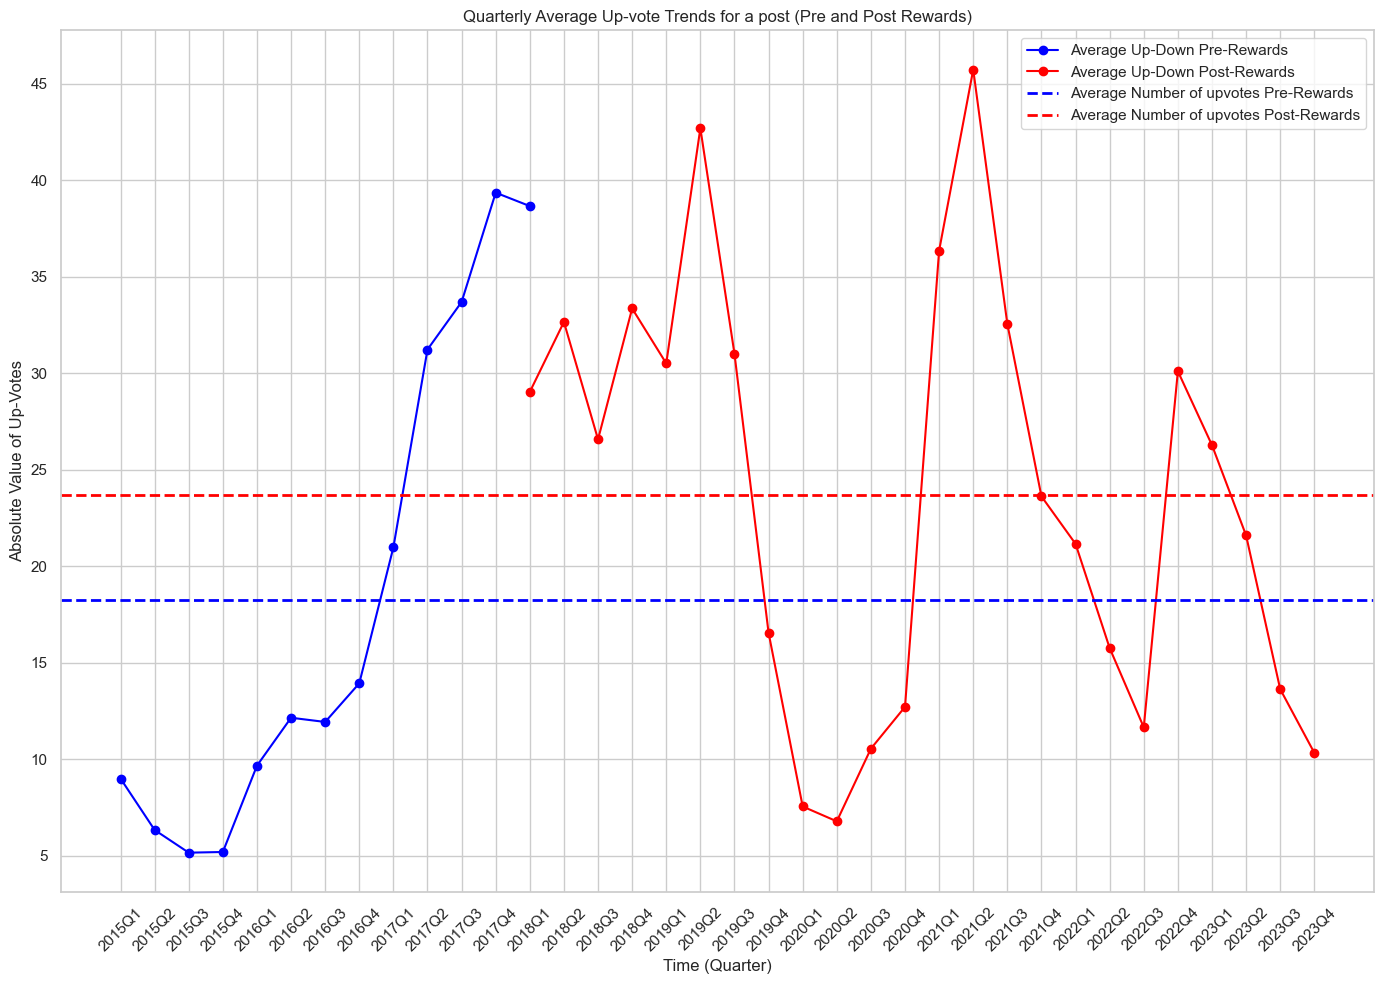

In [612]:
# Raggruppamento per trimestre e calcolo della somma degli Up-Down e del numero di post
pre_rewards['YearQuarter'] = pre_rewards['exact_data'].dt.to_period('Q')
quarterly_avg_pre = pre_rewards.groupby('YearQuarter')['Up-Down'].mean()

post_rewards['YearQuarter'] = post_rewards['exact_data'].dt.to_period('Q')
quarterly_avg_post = post_rewards.groupby('YearQuarter')['Up-Down'].mean()

plt.figure(figsize=(14, 10))

plt.plot(quarterly_avg_pre.index.astype(str), quarterly_avg_pre, 
          label='Average Up-Down Pre-Rewards', marker='o', color='blue')

plt.plot(quarterly_avg_post.index.astype(str), quarterly_avg_post, 
          label='Average Up-Down Post-Rewards', marker='o', color='red')


# Media numero post complessiva pre rewards
avg_post_per_quarter_pre = quarterly_avg_pre.mean()
plt.axhline(y=avg_post_per_quarter_pre, color='blue', linestyle='--', linewidth=2, 
            label='Average Number of upvotes Pre-Rewards')

# Media numero post complessiva post rewards
avg_post_per_quarter_post = quarterly_avg_post.mean()
plt.axhline(y=avg_post_per_quarter_post, color='red', linestyle='--', linewidth=2, 
            label='Average Number of upvotes Post-Rewards')

plt.title('Quarterly Average Up-vote Trends for a post (Pre and Post Rewards)')
plt.xlabel('Time (Quarter)')
plt.ylabel('Absolute Value of Up-Votes')
plt.xticks(rotation=45)
# Formattazione degli assi per mostrare valori assoluti
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Grafico numero di post per trimestre pre e post rewards


C:\Users\aless\AppData\Local\Temp\ipykernel_18216\1417248364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_rewards['YearQuarter'] = pre_rewards['exact_data'].dt.to_period('Q')
C:\Users\aless\AppData\Local\Temp\ipykernel_18216\1417248364.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_rewards['YearQuarter'] = post_rewards['exact_data'].dt.to_period('Q')


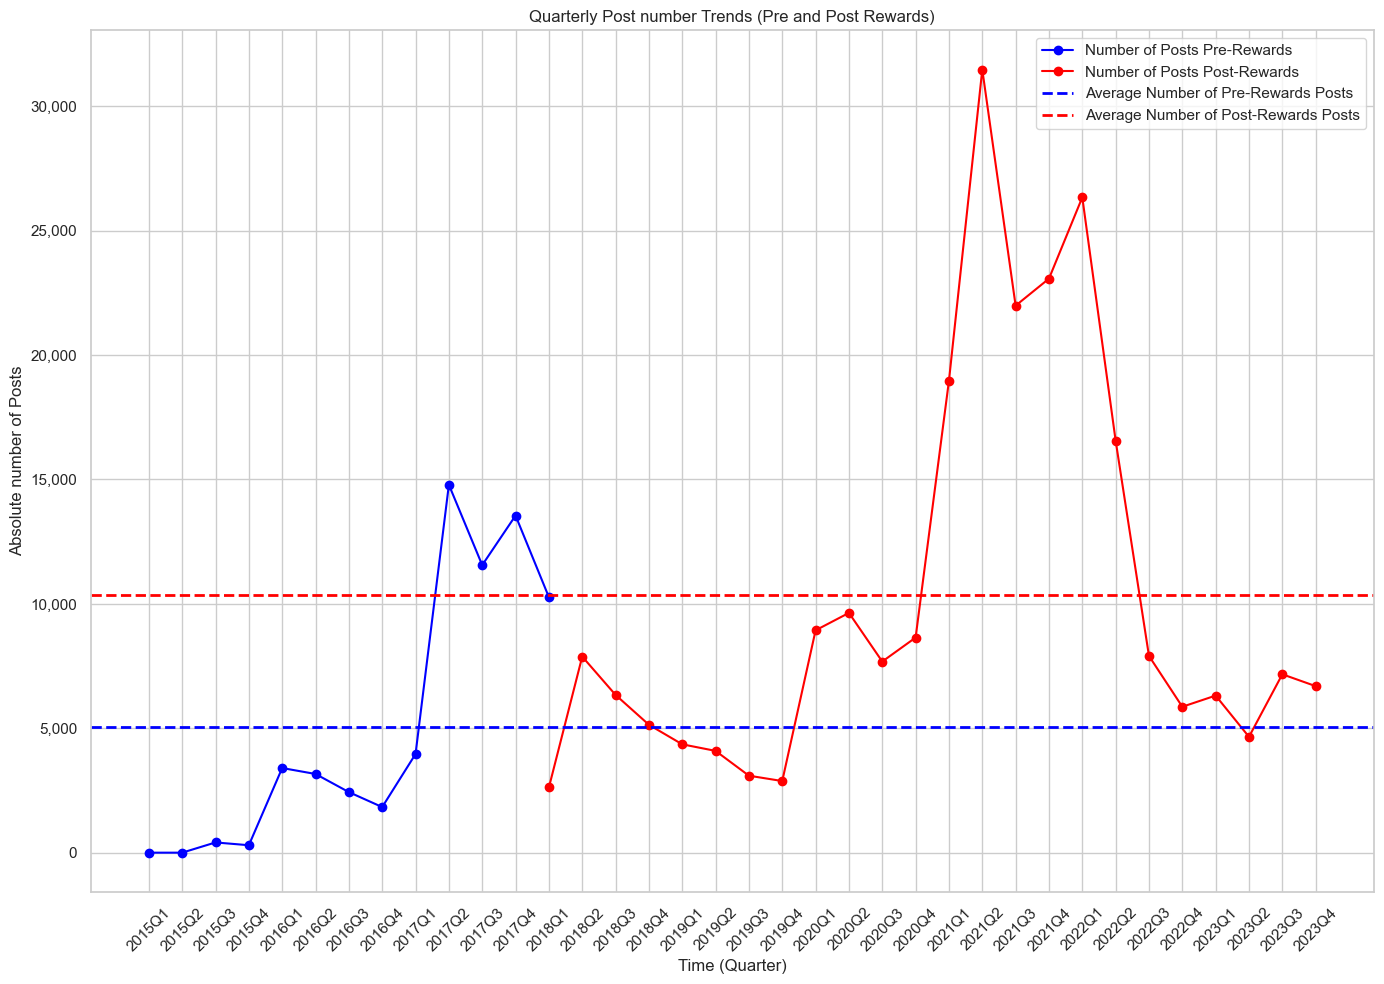

In [613]:
pre_rewards['YearQuarter'] = pre_rewards['exact_data'].dt.to_period('Q')
quarterly_avg_pre = pre_rewards.groupby('YearQuarter')['Up-Down'].sum()
quarterly_post_count_pre = pre_rewards.groupby('YearQuarter').size()

post_rewards['YearQuarter'] = post_rewards['exact_data'].dt.to_period('Q')
quarterly_avg_post = post_rewards.groupby('YearQuarter')['Up-Down'].sum()
quarterly_post_count_post = post_rewards.groupby('YearQuarter').size()


# Creazione del grafico
plt.figure(figsize=(14, 10))


# Plot del numero di post Pre-Rewards per trimestre
plt.plot(quarterly_post_count_pre.index.astype(str), quarterly_post_count_pre, 
          label='Number of Posts Pre-Rewards', marker='o', color='blue')


# Plot del numero di post Post-Rewards per trimestre
plt.plot(quarterly_post_count_post.index.astype(str), quarterly_post_count_post, 
          label='Number of Posts Post-Rewards', marker='o', color='red')

avg_post_per_quarter_pre = quarterly_post_count_pre.mean()
avg_post_per_quarter_post = quarterly_post_count_post.mean()

plt.axhline(y=avg_post_per_quarter_pre, color='blue', linestyle='--', linewidth=2, 
            label='Average Number of Pre-Rewards Posts')
plt.axhline(y=avg_post_per_quarter_post, color='red', linestyle='--', linewidth=2, 
            label='Average Number of Post-Rewards Posts')



# Personalizzazione del grafico
plt.title('Quarterly Post number Trends (Pre and Post Rewards)')
plt.xlabel('Time (Quarter)')
plt.ylabel('Absolute number of Posts')
plt.xticks(rotation=45)
# Formattazione degli assi per mostrare valori assoluti
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Numero commenti nel testo --> analisi pre post

In [614]:
file_zip = "C:\\Users\\aless\\Desktop\\reddit_distr\\posts"

os.chdir(file_zip)

# Mostra i file estratti
print("Files estratti:")
print(os.listdir())
comm=sorted(os.listdir())
comm=comm[:9]
# esclusione 2018 senza bkp
comm = comm[:2] + comm[3:]
comm

Files estratti:
['r_ethtrader_comments_2016.jsonl', 'r_ethtrader_comments_2017.jsonl', 'r_ethtrader_comments_2018.jsonl', 'r_ethtrader_comments_2018_bkp.jsonl', 'r_ethtrader_comments_2019.jsonl', 'r_ethtrader_comments_2020.jsonl', 'r_ethtrader_comments_2021.jsonl', 'r_ethtrader_comments_2022.jsonl', 'r_ethtrader_comments_2023.jsonl', 'r_ethtrader_posts_2016.jsonl', 'r_ethtrader_posts_2017.jsonl', 'r_ethtrader_posts_2018.jsonl', 'r_ethtrader_posts_2019.jsonl', 'r_ethtrader_posts_2020.jsonl', 'r_ethtrader_posts_2021.jsonl', 'r_ethtrader_posts_2022.jsonl', 'r_ethtrader_posts_2023.jsonl']


['r_ethtrader_comments_2016.jsonl',
 'r_ethtrader_comments_2017.jsonl',
 'r_ethtrader_comments_2018_bkp.jsonl',
 'r_ethtrader_comments_2019.jsonl',
 'r_ethtrader_comments_2020.jsonl',
 'r_ethtrader_comments_2021.jsonl',
 'r_ethtrader_comments_2022.jsonl',
 'r_ethtrader_comments_2023.jsonl']

In [615]:
comments=pd.DataFrame()
for i in comm:
  print(i)
  author=[]
  text=[]
  up_down=[]
  year=[]
  retrieved_on=[]
  retrieved_utc=[]
  created_utc=[]
  link_id=[]
  parent_id=[]
  with open(i, 'r', encoding='UTF-8') as f:
      for line in f:
        line=json.loads(line)
        author.append(line['author'])
        link_id.append(line['link_id'])
        parent_id.append(line['parent_id'])
        
        all_text=line['body']
        text.append(all_text.replace('\n', ' '))
        
        up_down.append(line['ups'])
        retrieved_on.append(line.get('retrieved_on', np.nan))
        retrieved_utc.append(line.get('retrieved_utc', np.nan))
        created_utc.append(line.get('created_utc', np.nan))
        if '2016' in i:
          year.append('2016')
        elif '2017' in i:
          year.append('2017')
        elif '2018' in i:
          year.append('2018')
        elif '2019' in i:
          year.append('2019')
        elif '2020' in i:
          year.append('2020')
        elif '2021' in i:
          year.append('2021')
        elif '2022' in i:
          year.append('2022')
        elif '2023' in i:
          year.append('2023')
          

  data = pd.DataFrame({
      'Author': author,
      'Text': text,
      'Up-Down': up_down,
      'Year': year,
      'retrieved_utc': retrieved_utc,
      'created_utc': created_utc,
      'Retrieved_on': retrieved_on,
      'Link_id': link_id,
      'Parent_id': parent_id    
    })
  comments = pd.concat([comments, data], ignore_index=True)

comments

r_ethtrader_comments_2016.jsonl
r_ethtrader_comments_2017.jsonl
r_ethtrader_comments_2018_bkp.jsonl
r_ethtrader_comments_2019.jsonl
r_ethtrader_comments_2020.jsonl
r_ethtrader_comments_2021.jsonl
r_ethtrader_comments_2022.jsonl
r_ethtrader_comments_2023.jsonl


,Author,Text,Up-Down,Year,retrieved_utc,created_utc,Retrieved_on,Link_id,Parent_id
0,heliumcraft,Bitcoin has a huge sell pressure due to miners...,5,2016,NaN,1427297921,1.432006e+09,t3_309d4v,t3_309d4v
1,i3nikolai,Positively!,2,2016,NaN,1427308310,1.432010e+09,t3_309d4v,t3_309d4v
2,sfgfd,I have a sneaking suspicion that POS won't mea...,1,2016,NaN,1427311073,1.432011e+09,t3_309d4v,t3_309d4v
3,anthony334,It's very _simple_. There is _no doubt in my ...,3,2016,NaN,1427318863,1.432013e+09,t3_309d4v,t3_309d4v
4,fabreeze,Can you mine ether now?,1,2016,NaN,1427342004,1.432019e+09,t3_309d4v,t3_309d4v
...,...,...,...,...,...,...,...,...,...
5544548,Abdeliq,Good bot,1,2023,NaN,1704066757,1.704067e+09,t3_18v73no,t1_kfpdfv1
5544549,Abdeliq,Good bot,1,2023,NaN,1704066779,1.704067e+09,t3_18v73no,t1_kfpkkzg
5544550,Abdeliq,Good bot,1,2023,NaN,1704066804,1.704067e+09,t3_18v73no,t1_kfpkwdx
5544551,Abdeliq,Good bot,1,2023,NaN,1704066855,1.704067e+09,t3_18v73no,t1_kfqab6k


In [616]:
comments['Retrieved_on'] = comments['Retrieved_on'].fillna(comments['retrieved_utc'])
comments['exact_data'] = pd.to_datetime(comments['Retrieved_on'], unit='s')


comments_sorted = comments.sort_values(by='exact_data')
df_oldest = comments_sorted.groupby('Link_id').first().reset_index()

comment_counts = comments.groupby('Link_id').count()['Author'].reset_index()
comment_counts.rename(columns={'Author': 'Comment_Count'}, inplace=True)

grouped_comments = pd.merge(df_oldest, comment_counts, on='Link_id')[[ 'Link_id', 'exact_data', 'Comment_Count','Up-Down']]
grouped_comments


,Link_id,exact_data,Comment_Count,Up-Down
0,t3_1000hkh,2023-01-06 16:34:39,1,1
1,t3_1000re9,2023-01-06 16:01:51,37,1
2,t3_1006x2i,2023-01-06 15:51:35,47,2
3,t3_1007tq2,2023-01-06 16:12:01,3,1
4,t3_1008c9f,2023-01-06 15:56:23,122,1
...,...,...,...,...
253071,t3_zzw8k6,2023-01-06 16:08:47,12,2
253072,t3_zzwfjr,2023-01-06 16:47:05,1,1
253073,t3_zzwpg9,2023-01-06 16:46:17,1,1
253074,t3_zzxoxf,2023-01-06 16:23:46,41,1


In [617]:
pre_rewards_comments = grouped_comments[grouped_comments['exact_data'] < pd.to_datetime('2018-03-04')]
pre_rewards_comments

,Link_id,exact_data,Comment_Count,Up-Down
23704,t3_309d4v,2015-05-19 03:34:00,9,5
23705,t3_30d1gd,2015-05-19 08:21:30,28,4
23706,t3_30n7k8,2015-05-20 01:51:16,7,1
23707,t3_30oaa4,2015-05-19 23:44:42,5,2
23708,t3_318y2v,2015-07-17 17:41:11,2,1
...,...,...,...,...
68541,t3_7zeajk,2018-03-03 22:10:51,4,1
68542,t3_7zebrj,2018-03-03 22:33:08,23,9
68546,t3_7zetk2,2018-03-03 22:43:17,17,1
68547,t3_7zf2ua,2018-03-03 23:09:33,9,3


In [618]:
post_rewards_comments = grouped_comments[~grouped_comments.index.isin(pre_rewards_comments.index)]
post_rewards_comments

,Link_id,exact_data,Comment_Count,Up-Down
0,t3_1000hkh,2023-01-06 16:34:39,1,1
1,t3_1000re9,2023-01-06 16:01:51,37,1
2,t3_1006x2i,2023-01-06 15:51:35,47,2
3,t3_1007tq2,2023-01-06 16:12:01,3,1
4,t3_1008c9f,2023-01-06 15:56:23,122,1
...,...,...,...,...
253071,t3_zzw8k6,2023-01-06 16:08:47,12,2
253072,t3_zzwfjr,2023-01-06 16:47:05,1,1
253073,t3_zzwpg9,2023-01-06 16:46:17,1,1
253074,t3_zzxoxf,2023-01-06 16:23:46,41,1


In [619]:
val_medio_x_temp_pre

YearQuarter
2015Q2    12.000000
2015Q3    10.852601
2015Q4     9.990385
2016Q1    12.895782
2016Q2    18.094400
2016Q3    24.176621
2016Q4    32.319595
2017Q1    31.892278
2017Q2    50.168478
2017Q3    46.615200
2017Q4    46.659840
2018Q1    59.180931
Freq: Q-DEC, Name: Comment_Count, dtype: float64

C:\Users\aless\AppData\Local\Temp\ipykernel_18216\1248883690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_rewards_comments['YearQuarter'] = pre_rewards_comments['exact_data'].dt.to_period('Q')
C:\Users\aless\AppData\Local\Temp\ipykernel_18216\1248883690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_rewards_comments['YearQuarter'] = post_rewards_comments['exact_data'].dt.to_period('Q')


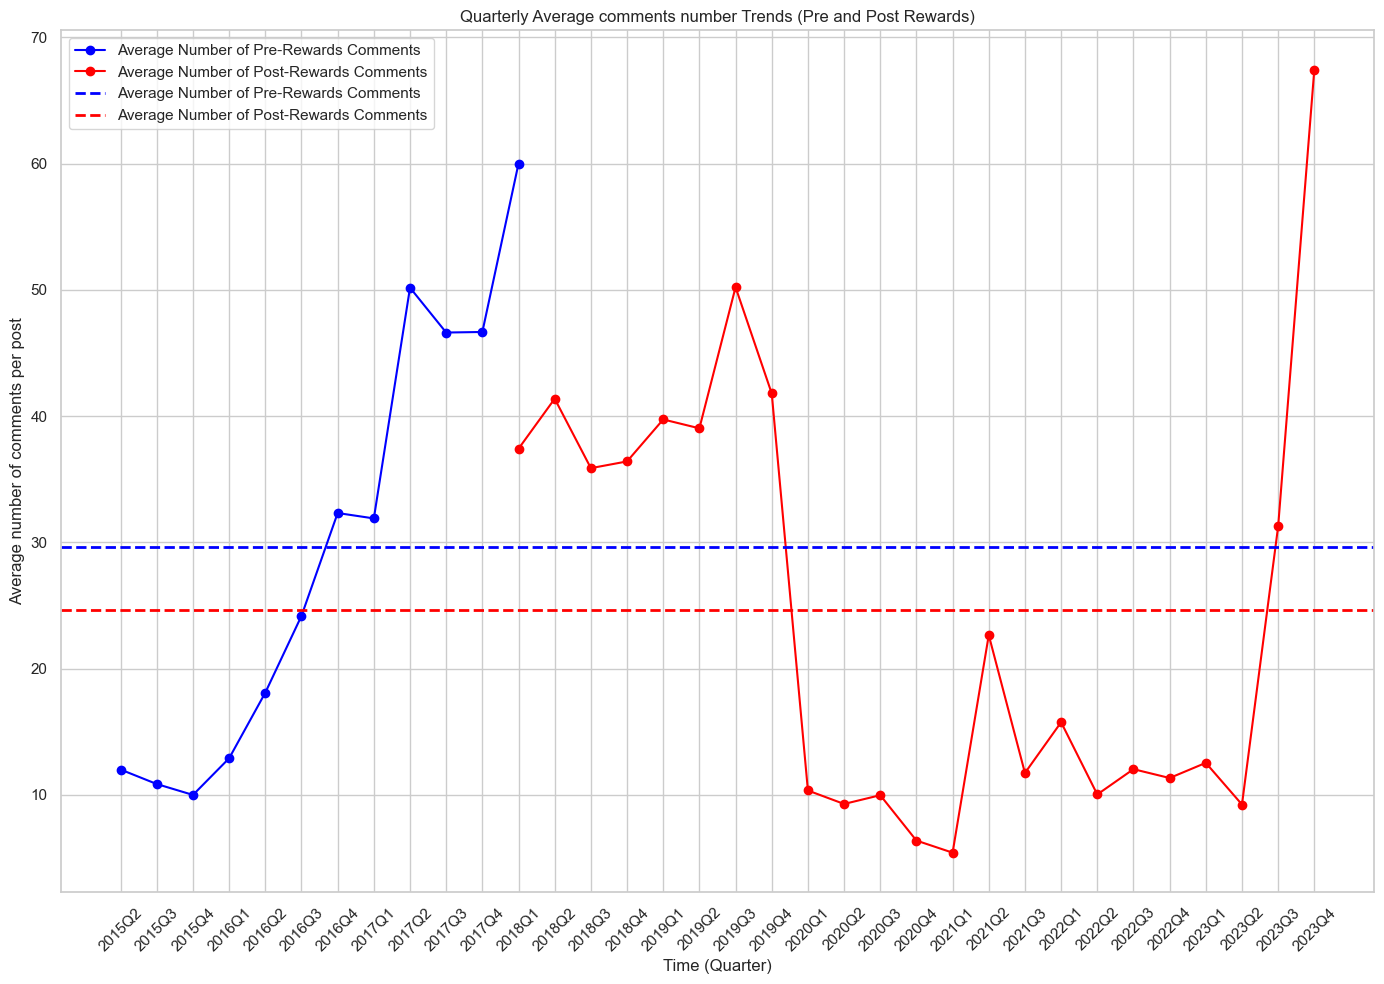

In [622]:

pre_rewards_comments['YearQuarter'] = pre_rewards_comments['exact_data'].dt.to_period('Q')
post_rewards_comments['YearQuarter'] = post_rewards_comments['exact_data'].dt.to_period('Q')


val_medio_x_temp_pre=pre_rewards_comments.groupby('YearQuarter').mean('Comment_Count')['Comment_Count']

val_medio_x_temp_post=post_rewards_comments.groupby('YearQuarter').mean('Comment_Count')['Comment_Count']


plt.figure(figsize=(14, 10))

plt.plot(val_medio_x_temp_pre.index.astype(str), val_medio_x_temp_pre, 
          label='Average Number of Pre-Rewards Comments', marker='o', color='blue')

plt.plot(val_medio_x_temp_post.index.astype(str), val_medio_x_temp_post, 
          label='Average Number of Post-Rewards Comments', marker='o', color='red')

avg_comments_per_quarter_pre = val_medio_x_temp_pre.mean()
avg_comments_per_quarter_post = val_medio_x_temp_post.mean()

plt.axhline(y=avg_comments_per_quarter_pre, color='blue', linestyle='--', linewidth=2, 
            label='Average Number of Pre-Rewards Comments')
plt.axhline(y=avg_comments_per_quarter_post, color='red', linestyle='--', linewidth=2, 
            label='Average Number of Post-Rewards Comments')


plt.title('Quarterly Average comments number Trends (Pre and Post Rewards)')
plt.xlabel('Time (Quarter)')
plt.ylabel('Average number of comments per post')
plt.xticks(rotation=45)
# Formattazione degli assi per mostrare valori assoluti
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# rewards analysis

In [543]:
file_zip = "C:\\Users\\aless\\Desktop\\reddit_distr"

os.chdir(file_zip)
print("Files estratti:")
print(os.listdir())

rewards=sorted(os.listdir())

string_list = [f"round_{str(i)}.csv" for i in range(93, 132)]

selected_rewards = [i for i in rewards if i in string_list]

selected_rewards




Files estratti:
['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', 'donut.distribution-main.zip', 'ethtrader_initial_distribution_onchain_20191204.csv', 'posts', 'round_1.csv', '

['round_100.csv',
 'round_101.csv',
 'round_102.csv',
 'round_103.csv',
 'round_104.csv',
 'round_105.csv',
 'round_106.csv',
 'round_107.csv',
 'round_108.csv',
 'round_109.csv',
 'round_110.csv',
 'round_111.csv',
 'round_112.csv',
 'round_113.csv',
 'round_114.csv',
 'round_115.csv',
 'round_116.csv',
 'round_117.csv',
 'round_118.csv',
 'round_119.csv',
 'round_120.csv',
 'round_121.csv',
 'round_122.csv',
 'round_123.csv',
 'round_124.csv',
 'round_125.csv',
 'round_126.csv',
 'round_127.csv',
 'round_128.csv',
 'round_129.csv',
 'round_130.csv',
 'round_131.csv',
 'round_93.csv',
 'round_94.csv',
 'round_95.csv',
 'round_96.csv',
 'round_97.csv',
 'round_98.csv',
 'round_99.csv']

In [546]:
from datetime import datetime, timedelta
import calendar

# Data del round 128
end_date = datetime(2023, 9, 27)

# Distanza tra i round in giorni
days_between_rounds = 28

# Funzione per calcolare la data del round
def get_round_date(end_date, round_number, days_between_rounds):
    return end_date - timedelta(days=(128 - round_number) * days_between_rounds)

# Funzione per determinare il trimestre
def get_quarter(date):
    month = date.month
    if month in [1, 2, 3]:
        return 1
    elif month in [4, 5, 6]:
        return 2
    elif month in [7, 8, 9]:
        return 3
    else:
        return 4

# Calcola le date e i trimestri per i round da 93 a 134
rounds_info = []
for round_number in range(93, 132):  # Esteso fino al round 134
    round_date = get_round_date(end_date, round_number, days_between_rounds)
    quarter = get_quarter(round_date)
    rounds_info.append((round_number, round_date.strftime('%d %B %Y'), f"Q{quarter}"))

# Stampa i risultati
diz= {}
for info in rounds_info:
    diz[f"round_{info[0]}.csv"] = f"{info[1][-4:]}{info[2]}"

diz  # Restituisce il dizionario con round fino al 134


{'round_93.csv': '20 January 2021 (January)',
 'round_94.csv': '17 February 2021 (February)',
 'round_95.csv': '17 March 2021 (March)',
 'round_96.csv': '14 April 2021 (April)',
 'round_97.csv': '12 May 2021 (May)',
 'round_98.csv': '09 June 2021 (June)',
 'round_99.csv': '07 July 2021 (July)',
 'round_100.csv': '04 August 2021 (August)',
 'round_101.csv': '01 September 2021 (September)',
 'round_102.csv': '29 September 2021 (September)',
 'round_103.csv': '27 October 2021 (October)',
 'round_104.csv': '24 November 2021 (November)',
 'round_105.csv': '22 December 2021 (December)',
 'round_106.csv': '19 January 2022 (January)',
 'round_107.csv': '16 February 2022 (February)',
 'round_108.csv': '16 March 2022 (March)',
 'round_109.csv': '13 April 2022 (April)',
 'round_110.csv': '11 May 2022 (May)',
 'round_111.csv': '08 June 2022 (June)',
 'round_112.csv': '06 July 2022 (July)',
 'round_113.csv': '03 August 2022 (August)',
 'round_114.csv': '31 August 2022 (August)',
 'round_115.csv': '

In [545]:
selected_file = selected_rewards
all_rewards=pd.DataFrame()
for i in selected_file:
  print(i)
  data=pd.read_csv(i)
  data['Year_Quarter']=diz[i]
  all_rewards=pd.concat([all_rewards, data], ignore_index=True)

all_rewards=all_rewards[['username',	'contributor_type',	'points',	'Year_Quarter']]
all_rewards

round_100.csv
round_101.csv
round_102.csv
round_103.csv
round_104.csv
round_105.csv
round_106.csv
round_107.csv
round_108.csv
round_109.csv
round_110.csv
round_111.csv
round_112.csv
round_113.csv
round_114.csv
round_115.csv
round_116.csv
round_117.csv
round_118.csv
round_119.csv
round_120.csv
round_121.csv
round_122.csv
round_123.csv
round_124.csv
round_125.csv
round_126.csv
round_127.csv
round_128.csv
round_129.csv
round_130.csv
round_131.csv
round_93.csv
round_94.csv
round_95.csv
round_96.csv
round_97.csv
round_98.csv
round_99.csv


,username,contributor_type,points,Year_Quarter
0,u/JohnFrontino,contributor,257217.0,2021Q3
1,u/SacredHam00,contributor,206573.0,2021Q3
2,u/fitbhai,contributor,177265.0,2021Q3
3,u/roymustang261,contributor,169598.0,2021Q3
4,u/Hodling-Since2018,contributor,126399.0,2021Q3
...,...,...,...,...
19650,u/alicenekocat,contributor,37.0,2021Q3
19651,u/spookily1,contributor,37.0,2021Q3
19652,u/betweenthebars34,contributor,37.0,2021Q3
19653,u/kingjoeg,contributor,37.0,2021Q3


In [318]:
all_data['created_datetime'] = pd.to_datetime(all_data['created_utc'], unit='s')

start_date = '2021-01-01'
end_date = '2024-03-31'
filtered_data = all_data[(all_data['created_datetime'] >= start_date) & 
                         (all_data['created_datetime'] <= end_date)]

filtered_data['Year_Quarter'] = filtered_data['created_datetime'].dt.to_period('Q')
filtered_data['Year_Quarter'] =filtered_data['Year_Quarter'].astype(str)
filtered_data['num_comments'] = filtered_data['num_comments'].fillna(0)

filtered_data


C:\Users\aless\AppData\Local\Temp\ipykernel_18216\2131731408.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year_Quarter'] = filtered_data['created_datetime'].dt.to_period('Q')
C:\Users\aless\AppData\Local\Temp\ipykernel_18216\2131731408.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year_Quarter'] =filtered_data['Year_Quarter'].astype(str)
C:\Users\aless\AppData\Local\Temp\ipykernel_18216\2131731408.py:10: SettingWithCopyWarning: 
A value is trying to be set on a cop

,Author,Text,Up-Down,Year,retrieved_utc,created_utc,Retrieved_on,num_comments,created_datetime,Year_Quarter
160154,SerialMasticator,"“Son, you should invest in tangible assets”",45,2021,1.623329e+09,1609459601,NaN,2,2021-01-01 00:06:41,2021Q1
160155,EthTraderCommunity,The world of Polkadot (DOT): A 2020 year in re...,5,2021,1.623329e+09,1609459702,NaN,1,2021-01-01 00:08:22,2021Q1
160157,Japs6991,Happy new year everyone! Happy tradings and th...,1,2021,1.623330e+09,1609466686,NaN,1,2021-01-01 02:04:46,2021Q1
160158,devboricha,Checkmate,41,2021,1.623330e+09,1609471437,NaN,4,2021-01-01 03:23:57,2021Q1
160159,MotherPop9,Desenvolvimento blockchain[removed],1,2021,1.623330e+09,1609472588,NaN,0,2021-01-01 03:43:08,2021Q1
...,...,...,...,...,...,...,...,...,...,...
365557,MasterpieceLoud4931,"In 2023, the US government tried to kill crypto",7,2023,NaN,1704047821,1.704048e+09,1,2023-12-31 18:37:01,2023Q4
365558,Prog132487,Biggest Crypto and NFT Games of 2023 - Decrypt,1,2023,NaN,1704051863,1.704052e+09,1,2023-12-31 19:44:23,2023Q4
365559,teeceaustralia,Vitalik Buterin Reveals Ethereum’s Road Map Fo...,7,2023,NaN,1704059279,1.704059e+09,1,2023-12-31 21:47:59,2023Q4
365560,aItalianStallion,"Chainlink News: CCIP, Data Feeds & Streams, Pr...",0,2023,NaN,1704064260,1.704064e+09,1,2023-12-31 23:11:00,2023Q4


In [626]:
filtered_data

,Author,Text,Up-Down,Year,retrieved_utc,created_utc,Retrieved_on,num_comments,created_datetime,Year-Month,Readability,TTR,Length,Num_Words,Num_Sentences,Num_Syllables,Avg_Sentence_Length
162838,EthTraderCommunity,Venture investor explains why Ethereum is pois...,4,2021,1.623353e+09,1611100865,NaN,4,2021-01-20 00:01:05,2021-01,3.6,13.000000,13.0,14.0,1.0,16.0,14.000000
162841,MostPopularDude,Ethereum 2.0 closes in on $4B value locked as ...,2,2021,1.623353e+09,1611102915,NaN,1,2021-01-20 00:35:15,2021-01,5.6,15.000000,15.0,17.0,1.0,20.0,17.000000
162842,moneyredpill,New ETH All-Time High! Where Do We Go From Her...,4,2021,1.623353e+09,1611103730,NaN,2,2021-01-20 00:48:50,2021-01,0.9,12.000000,12.0,16.0,3.0,14.0,5.333333
162846,EthTraderCommunity,11 indicators that suggest Ether’s new ATH is ...,21,2021,1.623353e+09,1611107466,NaN,6,2021-01-20 01:51:06,2021-01,6.4,11.000000,11.0,13.0,1.0,17.0,13.000000
162847,jacobinvestor,Become Financial free📈📊[removed],1,2021,1.623353e+09,1611108063,NaN,1,2021-01-20 02:01:03,2021-01,17.4,3.000000,3.0,6.0,1.0,8.0,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365557,MasterpieceLoud4931,"In 2023, the US government tried to kill crypto",7,2023,NaN,1704047821,1.704048e+09,1,2023-12-31 18:37:01,2023-12,3.3,9.000000,9.0,10.0,1.0,12.0,10.000000
365558,Prog132487,Biggest Crypto and NFT Games of 2023 - Decrypt,1,2023,NaN,1704051863,1.704052e+09,1,2023-12-31 19:44:23,2023-12,4.1,9.000000,9.0,9.0,1.0,11.0,9.000000
365559,teeceaustralia,Vitalik Buterin Reveals Ethereum’s Road Map Fo...,7,2023,NaN,1704059279,1.704059e+09,1,2023-12-31 21:47:59,2023-12,5.2,8.000000,8.0,10.0,1.0,12.0,10.000000
365560,aItalianStallion,"Chainlink News: CCIP, Data Feeds & Streams, Pr...",0,2023,NaN,1704064260,1.704064e+09,1,2023-12-31 23:11:00,2023-12,6.4,11.739130,15.0,23.0,1.0,19.0,23.000000


In [308]:
all_rewards['Author'] = [str(i)[2:] for i in all_rewards['username']]
all_rewards

,username,contributor_type,points,Year_Quarter,Author
0,u/JohnFrontino,contributor,257217.0,2021Q3,JohnFrontino
1,u/SacredHam00,contributor,206573.0,2021Q3,SacredHam00
2,u/fitbhai,contributor,177265.0,2021Q3,fitbhai
3,u/roymustang261,contributor,169598.0,2021Q3,roymustang261
4,u/Hodling-Since2018,contributor,126399.0,2021Q3,Hodling-Since2018
...,...,...,...,...,...
19650,u/alicenekocat,contributor,37.0,2021Q3,alicenekocat
19651,u/spookily1,contributor,37.0,2021Q3,spookily1
19652,u/betweenthebars34,contributor,37.0,2021Q3,betweenthebars34
19653,u/kingjoeg,contributor,37.0,2021Q3,kingjoeg


In [627]:
all_rewards['Author']

,username,contributor_type,points,Year-Month,Author
0,u/JohnFrontino,contributor,257217.0,2021-04,JohnFrontino
1,u/SacredHam00,contributor,206573.0,2021-04,SacredHam00
2,u/fitbhai,contributor,177265.0,2021-04,fitbhai
3,u/roymustang261,contributor,169598.0,2021-04,roymustang261
4,u/Hodling-Since2018,contributor,126399.0,2021-04,Hodling-Since2018
...,...,...,...,...,...
19650,u/alicenekocat,contributor,37.0,2021-07,alicenekocat
19651,u/spookily1,contributor,37.0,2021-07,spookily1
19652,u/betweenthebars34,contributor,37.0,2021-07,betweenthebars34
19653,u/kingjoeg,contributor,37.0,2021-07,kingjoeg


In [309]:
# Raggruppa per 'Year_Quarter' e 'Author'
filtered_data = filtered_data.groupby(['Year_Quarter', 'Author']).size().reset_index(name='Count')
all_rewards = all_rewards.groupby(['Year_Quarter', 'Author']).sum('points').reset_index()
filtered_data


,Year_Quarter,Author,Count
0,2021Q1,-0-O-,16
1,2021Q1,-AndyDufresne-,3
2,2021Q1,-Just_Another_Guy-,4
3,2021Q1,-S-I-D-,1
4,2021Q1,-_-DarthVader,1
...,...,...,...
36769,2023Q4,yangdhu,1
36770,2023Q4,yaykaboom,1
36771,2023Q4,yester_philippines,69
36772,2023Q4,yghookah21,1


In [256]:
correlazione = pd.merge(all_rewards, filtered_data, on=['Author','Year_Quarter'], how='left')
correlazione['Count'] = correlazione['Count'].fillna(0)

correlazione

,Year_Quarter,Author,points,Count
0,2021Q1,-0-O-,24372.000000,16.0
1,2021Q1,-AndyDufresne-,5556.000000,3.0
2,2021Q1,-CryptoMania,406.000000,0.0
3,2021Q1,-Just_Another_Guy-,1695.000000,4.0
4,2021Q1,-bawb405-,1960.000000,0.0
...,...,...,...,...
11173,2023Q4,zoid,1.904452,0.0
11174,2023Q4,zz_nickels,280.000000,0.0
11175,2023Q4,zzalu,50572.934610,0.0
11176,2023Q4,zzapicnic,3785.291884,0.0


In [257]:
a=correlazione[correlazione['Year_Quarter'] == '2023Q4']
a[a['Count']>0]

,Year_Quarter,Author,points,Count


In [258]:
periodi = correlazione['Year_Quarter'].unique()
periodi =periodi[:-1]
correlations_by_period = {}
for periodo in periodi:
    df_filtrato = correlazione[correlazione['Year_Quarter'] == periodo]
    correlations_by_period[periodo] = df_filtrato['points'].corr(df_filtrato['Count'])

correlations_by_period

{'2021Q1': 0.33503599945941925,
 '2021Q2': 0.4175906104698476,
 '2021Q3': 0.2509223366843782,
 '2021Q4': 0.49096357686574416,
 '2022Q1': 0.5062651151015676,
 '2022Q2': 0.48841752052003923,
 '2022Q3': 0.665618827783566,
 '2022Q4': 0.45004011861671706,
 '2023Q1': 0.24891183152811633,
 '2023Q2': 0.588063925292541,
 '2023Q3': 0.43807889336414435}

In [259]:
# Raggruppa i dati per trimestre (Year_Quarter)
grouped_data = correlazione.groupby('Year_Quarter').agg({'points': 'sum', 'Count': 'sum'}).reset_index()

# Calcola la correlazione tra points e Count a livello di periodo
correlation = grouped_data['points'].corr(grouped_data['Count'])
print(f'Correlazione per periodo: {correlation}')


Correlazione per periodo: 0.49614235369199905


Intercept: 6527.9412217541985, Coefficient: [147.60626611]
Correlation coefficient (Pearson): 0.35710637866643985


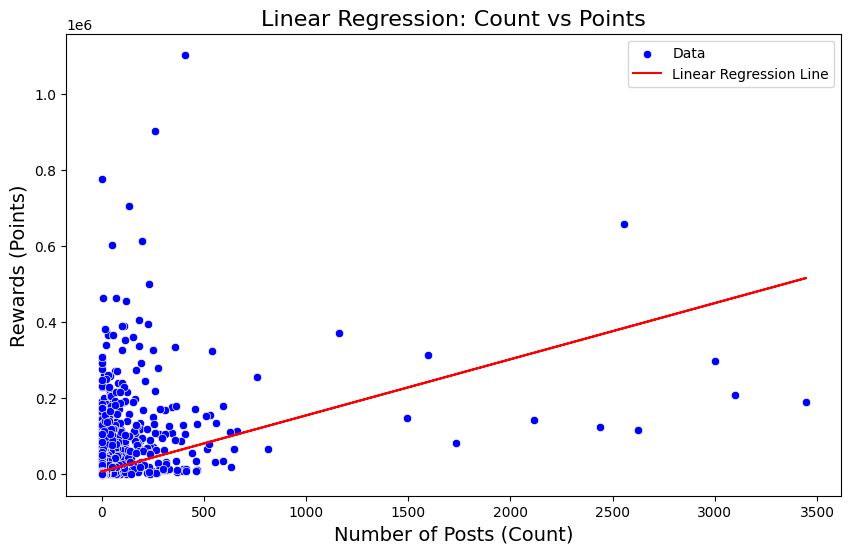

In [327]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = correlazione[['Count']].replace([np.inf, -np.inf], np.nan).dropna()
y = correlazione['points'].replace([np.inf, -np.inf], np.nan).dropna()

model = LinearRegression()
model.fit(X, y)
print(f"Intercept: {model.intercept_}, Coefficient: {model.coef_}")


import matplotlib.pyplot as plt
import seaborn as sns

# Previsione della linea di regressione
y_pred = model.predict(X)

# Calcolo del coefficiente di correlazione di Pearson
correlation = X['Count'].corr(y)
print(f"Correlation coefficient (Pearson): {correlation}")


# Creazione del grafico scatter
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Count'], y=y, label='Data', color='blue')

# Aggiungi la linea di regressione
plt.plot(X['Count'], y_pred, color='red', label='Linear Regression Line')

# Titolo e etichette
plt.title('Linear Regression: Count vs Points', fontsize=16)
plt.xlabel('Number of Posts (Count)', fontsize=14)
plt.ylabel('Rewards (Points)', fontsize=14)

# Mostra la leggenda
plt.legend()

# Mostra il grafico
plt.show()



## comments corr

In [320]:
all_data['created_datetime'] = pd.to_datetime(all_data['created_utc'], unit='s')

start_date = '2021-01-01'
end_date = '2024-03-31'
filtered_data = all_data[(all_data['created_datetime'] >= start_date) & 
                         (all_data['created_datetime'] <= end_date)]

filtered_data['Year_Quarter'] = filtered_data['created_datetime'].dt.to_period('Q')
filtered_data['Year_Quarter'] =filtered_data['Year_Quarter'].astype(str)


filtered_comm = filtered_data.groupby(['Year_Quarter', 'Author']).sum('num_comments').reset_index()
correlazione_comm = pd.merge(all_rewards, filtered_comm, on=['Author','Year_Quarter'], how='left')
correlazione_comm['num_comments'] = correlazione_comm['num_comments'].fillna(0)

correlazione_comm

C:\Users\aless\AppData\Local\Temp\ipykernel_18216\1308066537.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year_Quarter'] = filtered_data['created_datetime'].dt.to_period('Q')
C:\Users\aless\AppData\Local\Temp\ipykernel_18216\1308066537.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year_Quarter'] =filtered_data['Year_Quarter'].astype(str)


,Year_Quarter,Author,points,Up-Down,retrieved_utc,created_utc,Retrieved_on,num_comments
0,2021Q1,-0-O-,24372.000000,567.0,2.597460e+10,2.583961e+10,0.0,119.0
1,2021Q1,-AndyDufresne-,5556.000000,22.0,4.870168e+09,4.840467e+09,0.0,7.0
2,2021Q1,-CryptoMania,406.000000,NaN,NaN,NaN,NaN,0.0
3,2021Q1,-Just_Another_Guy-,1695.000000,11.0,6.493677e+09,6.461700e+09,0.0,24.0
4,2021Q1,-bawb405-,1960.000000,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...
11173,2023Q4,zoid,1.904452,NaN,NaN,NaN,NaN,0.0
11174,2023Q4,zz_nickels,280.000000,NaN,NaN,NaN,NaN,0.0
11175,2023Q4,zzalu,50572.934610,NaN,NaN,NaN,NaN,0.0
11176,2023Q4,zzapicnic,3785.291884,NaN,NaN,NaN,NaN,0.0


In [324]:
periodi = correlazione_comm['Year_Quarter'].unique()
periodi =periodi[:-1]
correlations_by_period = {}
for periodo in periodi:
    df_filtrato = correlazione_comm[correlazione_comm['Year_Quarter'] == periodo]
    correlations_by_period[periodo] = df_filtrato['points'].corr(df_filtrato['num_comments'])

correlations_by_period

{'2021Q1': 0.8213189211889889,
 '2021Q2': 0.6999626884425524,
 '2021Q3': 0.5307267820370234,
 '2021Q4': 0.6305860498261756,
 '2022Q1': 0.7649061248460644,
 '2022Q2': 0.707673527405628,
 '2022Q3': 0.7867814376167829,
 '2022Q4': 0.6456678027145025,
 '2023Q1': 0.5499267586730098,
 '2023Q2': 0.684107483413869,
 '2023Q3': 0.5548483963595069}

Correlation coefficient (Pearson): 0.5036168226125071
Intercept: 5195.782829380354, Coefficient: [24.88895157]


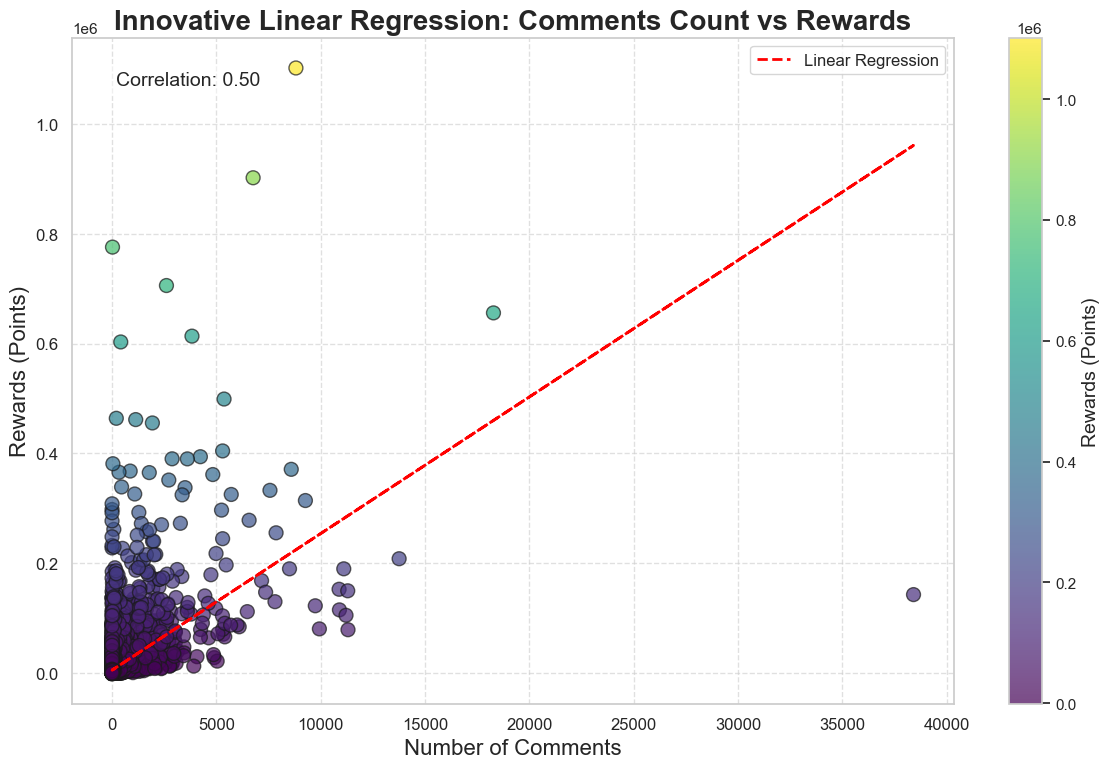

In [330]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Prepara i dati, eliminando i valori infiniti e mancanti
X = correlazione_comm[['num_comments']].replace([np.inf, -np.inf], np.nan).dropna()
y = correlazione_comm['points'].replace([np.inf, -np.inf], np.nan).dropna()

# Modello di regressione lineare
model = LinearRegression()
model.fit(X, y)

# Previsione della linea di regressione
y_pred = model.predict(X)

# Calcolo del coefficiente di correlazione di Pearson
correlation = X['num_comments'].corr(y)
print(f"Correlation coefficient (Pearson): {correlation}")

# Intercept e Coefficiente della regressione lineare
print(f"Intercept: {model.intercept_}, Coefficient: {model.coef_}")

# Imposta un tema di Seaborn per una grafica più pulita
sns.set_theme(style="whitegrid")

# Crea il grafico
plt.figure(figsize=(12, 8))

# Scatter plot con color map basata sul numero di commenti (num_comments)
scatter = plt.scatter(X['num_comments'], y, c=y, cmap='viridis', alpha=0.7, edgecolor='k', s=100)

# Aggiungi la linea di regressione
plt.plot(X['num_comments'], y_pred, color='red', linestyle='--', linewidth=2, label='Linear Regression')

# Aggiungi una barra di colore per rappresentare la distribuzione dei points
cbar = plt.colorbar(scatter)
cbar.set_label('Rewards (Points)', fontsize=14)

# Titolo e etichette con miglioramenti estetici
plt.title('Innovative Linear Regression: Comments Count vs Rewards', fontsize=20, fontweight='bold')
plt.xlabel('Number of Comments', fontsize=16)
plt.ylabel('Rewards (Points)', fontsize=16)

# Mostra la correlazione nel titolo
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, 
         fontsize=14, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Aggiungi la legenda
plt.legend(fontsize=12)

# Migliora l'estetica delle ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Aggiungi griglia per rendere più leggibile
plt.grid(True, linestyle='--', alpha=0.6)

# Riduci spazi bianchi
plt.tight_layout()

# Mostra il grafico
plt.show()


# Upvote

In [333]:
all_data['created_datetime'] = pd.to_datetime(all_data['created_utc'], unit='s')

start_date = '2021-01-01'
end_date = '2024-03-31'
filtered_data = all_data[(all_data['created_datetime'] >= start_date) & 
                         (all_data['created_datetime'] <= end_date)]

filtered_data['Year_Quarter'] = filtered_data['created_datetime'].dt.to_period('Q')
filtered_data['Year_Quarter'] =filtered_data['Year_Quarter'].astype(str)


filtered_up= filtered_data.groupby(['Year_Quarter', 'Author']).sum('Up-Down').reset_index()
correlazione_up = pd.merge(all_rewards, filtered_up, on=['Author','Year_Quarter'], how='left')
correlazione_up['Up-Down'] = correlazione_up['Up-Down'].fillna(0)

correlazione_up

C:\Users\aless\AppData\Local\Temp\ipykernel_18216\2380845096.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year_Quarter'] = filtered_data['created_datetime'].dt.to_period('Q')
C:\Users\aless\AppData\Local\Temp\ipykernel_18216\2380845096.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year_Quarter'] =filtered_data['Year_Quarter'].astype(str)


,Year_Quarter,Author,points,Up-Down,retrieved_utc,created_utc,Retrieved_on,num_comments
0,2021Q1,-0-O-,24372.000000,567.0,2.597460e+10,2.583961e+10,0.0,119.0
1,2021Q1,-AndyDufresne-,5556.000000,22.0,4.870168e+09,4.840467e+09,0.0,7.0
2,2021Q1,-CryptoMania,406.000000,0.0,NaN,NaN,NaN,NaN
3,2021Q1,-Just_Another_Guy-,1695.000000,11.0,6.493677e+09,6.461700e+09,0.0,24.0
4,2021Q1,-bawb405-,1960.000000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
11173,2023Q4,zoid,1.904452,0.0,NaN,NaN,NaN,NaN
11174,2023Q4,zz_nickels,280.000000,0.0,NaN,NaN,NaN,NaN
11175,2023Q4,zzalu,50572.934610,0.0,NaN,NaN,NaN,NaN
11176,2023Q4,zzapicnic,3785.291884,0.0,NaN,NaN,NaN,NaN


In [334]:
periodi = correlazione_up['Year_Quarter'].unique()
periodi =periodi[:-1]
correlations_by_period = {}
for periodo in periodi:
    df_filtrato = correlazione_up[correlazione_up['Year_Quarter'] == periodo]
    correlations_by_period[periodo] = df_filtrato['points'].corr(df_filtrato['Up-Down'])

correlations_by_period

{'2021Q1': 0.7827100034427938,
 '2021Q2': 0.6019075793669656,
 '2021Q3': 0.519136127825708,
 '2021Q4': 0.6788042218568726,
 '2022Q1': 0.7047041496869445,
 '2022Q2': 0.6617141934767151,
 '2022Q3': 0.8722269551015893,
 '2022Q4': 0.5109588628767237,
 '2023Q1': 0.5164319570414271,
 '2023Q2': 0.5395714388092524,
 '2023Q3': 0.45169192621145887}

Intercept: 6527.9412217541985, Coefficient: [147.60626611]
Intercept: 5195.782829380354, Coefficient: [24.88895157]


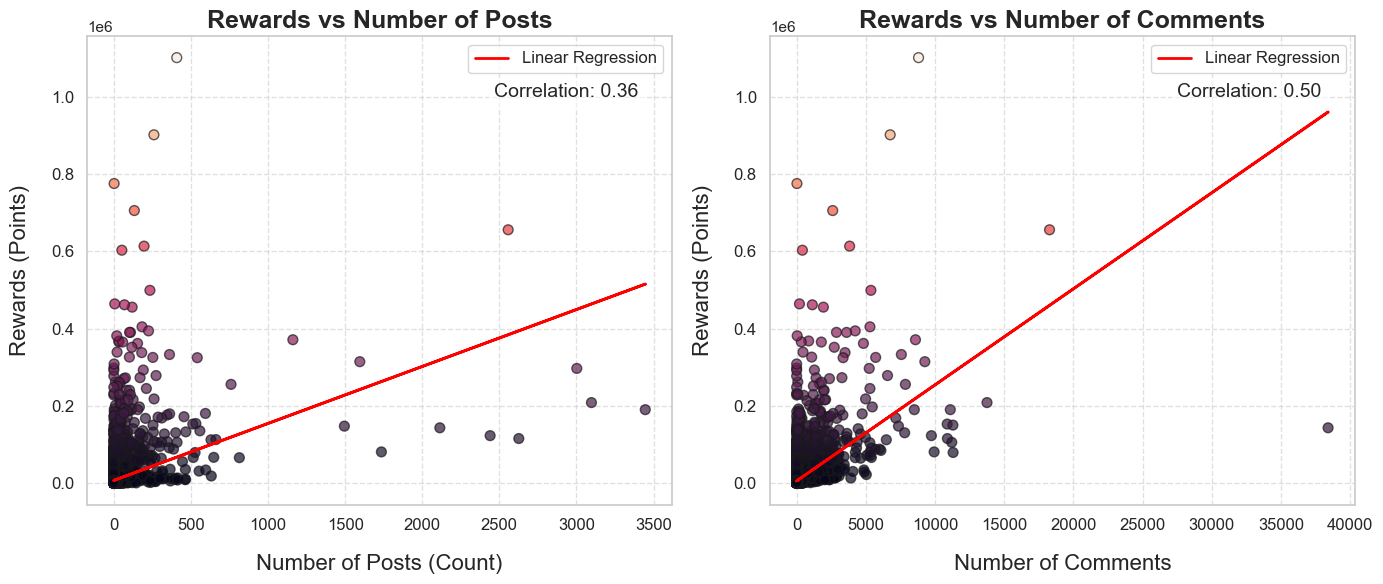

In [403]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Imposta il tema di Seaborn e usa la palette HUSL
sns.set_theme(style="whitegrid")

# Crea una griglia di figure: 1 riga e 2 colonne
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Funzione per calcolare il grafico di regressione lineare
def plot_regression(X, y, xlabel, ylabel, title, ax):
    # Modello di regressione lineare
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Calcolo della correlazione
    correlation = X.iloc[:, 0].corr(y)
    
    # Intercept e coefficiente
    print(f"Intercept: {model.intercept_}, Coefficient: {model.coef_}")

    # Scatter plot con color map HUSL
    scatter = ax.scatter(X.iloc[:, 0], y, c=y, alpha=0.7, edgecolor='k', s=50)
    
    # Aggiungi la linea di regressione
    ax.plot(X.iloc[:, 0], y_pred, color='red', linestyle='-', linewidth=2, label='Linear Regression')

    # # Aggiungi barra di colore
    # cbar = fig.colorbar(scatter, ax=ax)
    # cbar.set_label('Rewards (Points)', fontsize=14)

    # Titolo e etichette
    ax.set_title(title, fontsize=18, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=16, labelpad=15)
    ax.set_ylabel(ylabel, fontsize=16, labelpad=15)

    # Aggiungi la correlazione sotto la legenda
    ax.legend(fontsize=12)
    ax.text(0.82, 0.9, f'Correlation: {correlation:.2f}', transform=ax.transAxes, 
            fontsize=14, verticalalignment='top', horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

    # Migliora l'estetica delle ticks
    ax.tick_params(axis='both', which='major', labelsize=12)

    # Aggiungi griglia
    ax.grid(True, linestyle='--', alpha=0.6)

# Dati per il primo grafico (Count vs Points)
X1 = correlazione[['Count']].replace([np.inf, -np.inf], np.nan).dropna()
y1 = correlazione['points'].replace([np.inf, -np.inf], np.nan).dropna()
plot_regression(X1, y1, 'Number of Posts (Count)', 'Rewards (Points)', 'Rewards vs Number of Posts', axes[0])

# Dati per il secondo grafico (num_comments vs Points)
X2 = correlazione_comm[['num_comments']].replace([np.inf, -np.inf], np.nan).dropna()
y2 = correlazione_comm['points'].replace([np.inf, -np.inf], np.nan).dropna()
plot_regression(X2, y2, 'Number of Comments', 'Rewards (Points)', 'Rewards vs Number of Comments', axes[1])

# Riduci spazi bianchi
plt.tight_layout()

# Mostra tutti i grafici
plt.show()


Intercept: 5002.154905656742, Coefficient: [8.20058016]


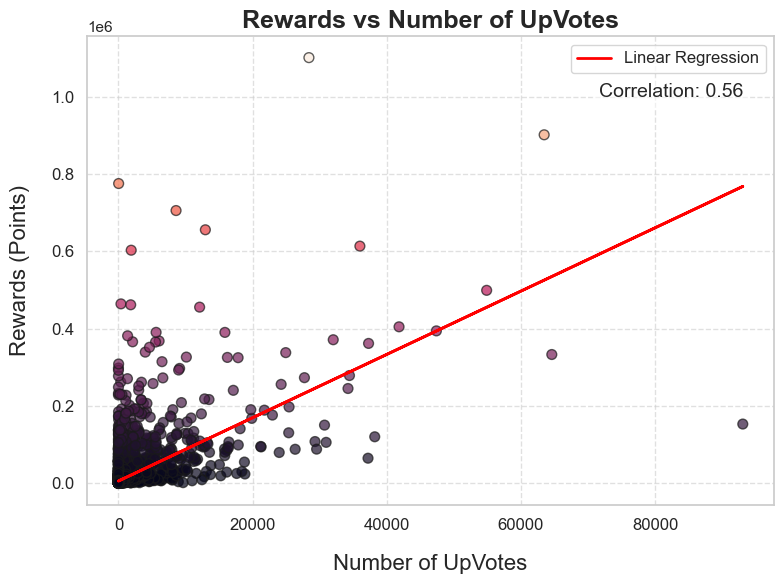

In [401]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Imposta il tema di Seaborn e usa la palette HUSL
sns.set_theme(style="whitegrid")

# Crea una figura per il terzo grafico
fig, ax = plt.subplots(figsize=(8, 6))

# Funzione per calcolare il grafico di regressione lineare
def plot_regression(X, y, xlabel, ylabel, title, ax):
    # Modello di regressione lineare
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Calcolo della correlazione
    correlation = X.iloc[:, 0].corr(y)
    
    # Intercept e coefficiente
    print(f"Intercept: {model.intercept_}, Coefficient: {model.coef_}")

    # Scatter plot con color map HUSL
    scatter = ax.scatter(X.iloc[:, 0], y, c=y, alpha=0.7, edgecolor='k', s=50)
    
    # Aggiungi la linea di regressione
    ax.plot(X.iloc[:, 0], y_pred, color='red', linestyle='-', linewidth=2, label='Linear Regression')

    # # Aggiungi barra di colore
    # cbar = fig.colorbar(scatter, ax=ax)
    # cbar.set_label('Rewards (Points)', fontsize=14)

    # Titolo e etichette
    ax.set_title(title, fontsize=18, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=16, labelpad=15)
    ax.set_ylabel(ylabel, fontsize=16, labelpad=15)

    # Aggiungi la correlazione sotto la legenda
    ax.legend(fontsize=12)
    ax.text(0.85, 0.9, f'Correlation: {correlation:.2f}', transform=ax.transAxes, 
            fontsize=14, verticalalignment='top', horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

    # Migliora l'estetica delle ticks
    ax.tick_params(axis='both', which='major', labelsize=12)

    # Aggiungi griglia
    ax.grid(True, linestyle='--', alpha=0.6)

# Dati per il terzo grafico (Up-Down vs Points)
X3 = correlazione_up[['Up-Down']].replace([np.inf, -np.inf], np.nan).dropna()
y3 = correlazione_up['points'].replace([np.inf, -np.inf], np.nan).dropna()
plot_regression(X3, y3, 'Number of UpVotes', 'Rewards (Points)', 'Rewards vs Number of UpVotes', ax)

# Riduci spazi bianchi
plt.tight_layout()

# Mostra il grafico
plt.show()


In [386]:
top_5_points = correlazione_up.nlargest(5, 'points')
top_5_points

,Year_Quarter,Author,points,Up-Down,retrieved_utc,created_utc,Retrieved_on,num_comments
2089,2021Q2,dont_forget_canada,1101999.0,28393.0,6.624737e+11,6.613073e+11,0.000000e+00,8810.0
1015,2021Q1,salil19,902058.0,63462.0,4.220825e+11,4.195846e+11,0.000000e+00,6760.0
3104,2021Q3,JohnFrontino,775750.0,26.0,3.312434e+09,3.250985e+09,3.312434e+09,22.0
688,2021Q1,dont_forget_canada,705771.0,8585.0,2.159147e+11,2.148509e+11,0.000000e+00,2607.0
7573,2022Q3,EthTraderCommunity,655935.0,12955.0,0.000000e+00,4.246598e+12,4.251903e+12,18276.0


## Qualità dei post

In [570]:
file_zip = "C:\\Users\\aless\\Desktop\\reddit_distr"

os.chdir(file_zip)
print("Files estratti:")
print(os.listdir())

rewards=sorted(os.listdir())

string_list = [f"round_{str(i)}.csv" for i in range(93, 132)]

selected_rewards = [i for i in rewards if i in string_list]

end_date = datetime(2023, 9, 27)

days_between_rounds = 28

def get_round_date(end_date, round_number, days_between_rounds):
    return end_date - timedelta(days=(128 - round_number) * days_between_rounds)

def get_quarter(date):
    month = date.month
    if month in [1, 2, 3]:
        return 1
    elif month in [4, 5, 6]:
        return 2
    elif month in [7, 8, 9]:
        return 3
    else:
        return 4

def get_month(date):
    return calendar.month_name[date.month]

rounds_info = []
for round_number in range(93, 132):  # Esteso fino al round 134
    round_date = get_round_date(end_date, round_number, days_between_rounds)
    quarter = get_quarter(round_date)
    month = get_month(round_date)
    rounds_info.append((round_number, round_date.strftime('%d %B %Y'), f"Q{quarter}", month))

diz = {}
for info in rounds_info:
    round_file = f"round_{info[0]}.csv"
    date_str = info[1]
    month_str = info[3]
    diz[round_file] = f"{date_str[-4:]}-{date_str[:2]}"

print(diz)

all_rewards=pd.DataFrame()
for i in selected_file:
  data=pd.read_csv(i)
  data['Year-Month']=diz[i]
  all_rewards=pd.concat([all_rewards, data], ignore_index=True)

all_rewards=all_rewards[['username',	'contributor_type',	'points',	'Year-Month']]
all_rewards=all_rewards[all_rewards['contributor_type']=='contributor']
all_rewards['Author']=all_rewards['username'].str[2:]
all_rewards


Files estratti:
['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', 'donut.distribution-main.zip', 'ethtrader_initial_distribution_onchain_20191204.csv', 'posts', 'round_1.csv', '

,username,contributor_type,points,Year-Month,Author
0,u/JohnFrontino,contributor,257217.0,2021-04,JohnFrontino
1,u/SacredHam00,contributor,206573.0,2021-04,SacredHam00
2,u/fitbhai,contributor,177265.0,2021-04,fitbhai
3,u/roymustang261,contributor,169598.0,2021-04,roymustang261
4,u/Hodling-Since2018,contributor,126399.0,2021-04,Hodling-Since2018
...,...,...,...,...,...
19650,u/alicenekocat,contributor,37.0,2021-07,alicenekocat
19651,u/spookily1,contributor,37.0,2021-07,spookily1
19652,u/betweenthebars34,contributor,37.0,2021-07,betweenthebars34
19653,u/kingjoeg,contributor,37.0,2021-07,kingjoeg


In [572]:
grouped_rewards = all_rewards.groupby(['Year-Month', 'Author']).mean('points').reset_index()
grouped_rewards

,Year-Month,Author,points
0,2021-01,-0-O-,100.0
1,2021-01,-CryptoMania,529.0
2,2021-01,-Jive-Turkey-,227.0
3,2021-01,-_Potato,75.0
4,2021-01,-pm-me-titties,100.0
...,...,...,...
16983,2023-30,whodontloveboobs,966.0
16984,2023-30,wmredditor,38.0
16985,2023-30,wright6c,2900.0
16986,2023-30,yester_philippines,5182.0


In [591]:
import pandas as pd
import numpy as np
from nltk import word_tokenize, sent_tokenize
from textstat import flesch_kincaid_grade, syllable_count

# Assicurarsi di aver convertito correttamente la colonna 'created_datetime'
all_data['created_datetime'] = pd.to_datetime(all_data['created_utc'], unit='s')

# Filtrare i dati per data >= 20 gennaio 2021
filtered_data = all_data[all_data['created_datetime'] >= '2021-01-20']

# Aggiungere la colonna 'Year-Month'
filtered_data['Year-Month'] = filtered_data['created_datetime'].dt.to_period('M').astype(str)

# Funzione per calcolare le caratteristiche testuali
def compute_text_features(text):
    # Readability Score (Punteggio di leggibilità)
    readability_score = flesch_kincaid_grade(text)
    
    # Tokenizzazione delle parole e delle frasi
    tokens = word_tokenize(text)
    sentences = sent_tokenize(text)
    
    # Calcolare il numero di parole, frasi, sillabe e altre caratteristiche
    num_words = len(tokens)
    num_sentences = len(sentences)
    num_syllables = syllable_count(text)
    length = len(text.split())
    
    # Type-Token Ratio (TTR) ponderato per la lunghezza del testo
    if num_words > 0:
        type_token_ratio = len(set(tokens)) / num_words * length
    else:
        type_token_ratio = 0
    
    # Lunghezza media delle frasi
    if num_sentences > 0:
        avg_sentence_length = num_words / num_sentences
    else:
        avg_sentence_length = 0
    
    return pd.Series([
        readability_score, type_token_ratio, length, num_words, 
        num_sentences, num_syllables, avg_sentence_length
    ])

# Applicare la funzione per calcolare le caratteristiche per tutti i testi
text_features_all = filtered_data['Text'].apply(compute_text_features)

# Aggiungere i nomi delle colonne corrispondenti
text_features_all.columns = [
    'Readability', 'TTR', 'Length', 'Num_Words', 
    'Num_Sentences', 'Num_Syllables', 'Avg_Sentence_Length'
]

# Aggiungere le caratteristiche calcolate al dataframe originale
filtered_data['Readability'] = text_features_all['Readability']
filtered_data['TTR'] = text_features_all['TTR']
filtered_data['Length'] = text_features_all['Length']
filtered_data['Num_Words'] = text_features_all['Num_Words']
filtered_data['Num_Sentences'] = text_features_all['Num_Sentences']
filtered_data['Num_Syllables'] = text_features_all['Num_Syllables']
filtered_data['Avg_Sentence_Length'] = text_features_all['Avg_Sentence_Length']

# Visualizza il dataframe aggiornato
filtered_data.head()


C:\Users\aless\AppData\Local\Temp\ipykernel_18216\3654121738.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year-Month'] = filtered_data['created_datetime'].dt.to_period('M').astype(str)
C:\Users\aless\AppData\Local\Temp\ipykernel_18216\3654121738.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Readability'] = text_features_all['Readability']
C:\Users\aless\AppData\Local\Temp\ipykernel_18216\3654121738.py:85: SettingWithCopyWarning: 
A value is trying to be set on a 

,Author,Text,Up-Down,Year,retrieved_utc,created_utc,Retrieved_on,num_comments,created_datetime,Year-Month,Readability,TTR,Length,Num_Words,Num_Sentences,Num_Syllables,Avg_Sentence_Length
162838,EthTraderCommunity,Venture investor explains why Ethereum is pois...,4,2021,1.623353e+09,1611100865,NaN,4,2021-01-20 00:01:05,2021-01,3.6,13.0,13.0,14.0,1.0,16.0,14.000000
162841,MostPopularDude,Ethereum 2.0 closes in on $4B value locked as ...,2,2021,1.623353e+09,1611102915,NaN,1,2021-01-20 00:35:15,2021-01,5.6,15.0,15.0,17.0,1.0,20.0,17.000000
162842,moneyredpill,New ETH All-Time High! Where Do We Go From Her...,4,2021,1.623353e+09,1611103730,NaN,2,2021-01-20 00:48:50,2021-01,0.9,12.0,12.0,16.0,3.0,14.0,5.333333
162846,EthTraderCommunity,11 indicators that suggest Ether’s new ATH is ...,21,2021,1.623353e+09,1611107466,NaN,6,2021-01-20 01:51:06,2021-01,6.4,11.0,11.0,13.0,1.0,17.0,13.000000
162847,jacobinvestor,Become Financial free📈📊[removed],1,2021,1.623353e+09,1611108063,NaN,1,2021-01-20 02:01:03,2021-01,17.4,3.0,3.0,6.0,1.0,8.0,6.000000


In [593]:
grouped = filtered_data.groupby(['Year-Month', 'Author']).agg({
    'Readability': 'mean', 
    'TTR': 'mean', 
    'Year': 'count',
    'Up-Down': 'sum',   
    'num_comments': 'sum',
    'Num_Words': 'mean',
    'Num_Sentences': 'mean',
    'Num_Syllables': 'mean',
    'Avg_Sentence_Length': 'mean'
}).reset_index()

grouped_data = grouped.rename(columns={'Year': 'num_posts'})
grouped_data


,Year-Month,Author,Readability,TTR,num_posts,Up-Down,num_comments,Num_Words,Num_Sentences,Num_Syllables,Avg_Sentence_Length
0,2021-01,-0-O-,11.500000,9.000000,1,15,7,12.000000,1.000000,18.000000,12.000000
1,2021-01,-ksguy-,6.500000,83.381295,1,1,8,139.000000,5.000000,148.000000,27.800000
2,2021-01,-supertec-,0.900000,6.000000,1,3,1,6.000000,1.000000,7.000000,6.000000
3,2021-01,0x726564646974,2.500000,7.000000,1,23,19,9.000000,1.000000,9.000000,9.000000
4,2021-01,0x_ygem,16.500000,6.222222,1,1,0,18.000000,2.000000,18.000000,9.000000
...,...,...,...,...,...,...,...,...,...,...,...
42771,2023-12,wood8,5.100000,79.127273,1,0,1,165.000000,10.000000,177.000000,16.500000
42772,2023-12,xSamuel31x,2.100000,6.000000,1,1,1,7.000000,1.000000,8.000000,7.000000
42773,2023-12,yangdhu,7.200000,4.000000,1,1,0,7.000000,1.000000,7.000000,7.000000
42774,2023-12,yester_philippines,9.352632,33.746982,19,339,122,55.578947,1.842105,70.421053,28.833333


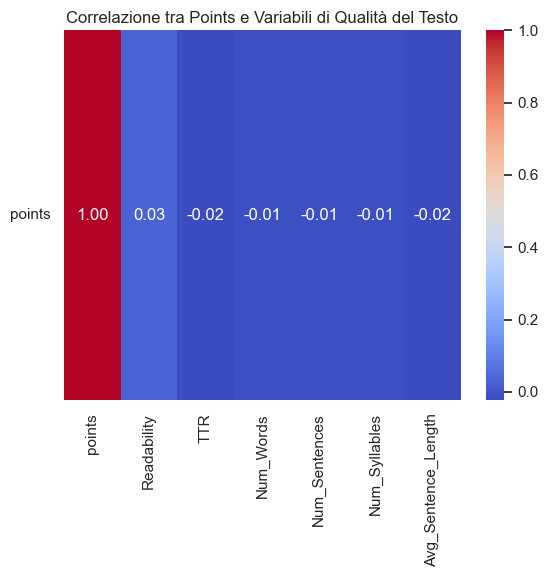

In [624]:
x_corr = pd.merge(grouped_rewards, grouped_data, on=['Year-Month', 'Author'], how='left')

# Supponendo che x_corr sia già definito come nel tuo codice
qual_correlations = x_corr[['points', 'Readability', 'TTR', 'Num_Words', 'Num_Sentences', 'Num_Syllables', 'Avg_Sentence_Length']].corr(method='pearson')

# Filtra solo la riga corrispondente a 'points'
points_correlations = qual_correlations.loc[['points']]

# Crea una heatmap con solo le correlazioni dei 'points'
sns.heatmap(points_correlations, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlazione tra Points e Variabili di Qualità del Testo')
plt.yticks(rotation=0)
plt.show()


In [577]:
comments['created_datetime'] = pd.to_datetime(comments['created_utc'], unit='s')

filtered_comments = comments[comments['created_datetime'] >= '2021-01-20']
filtered_comments['Year-Month'] = filtered_comments['created_datetime'].dt.to_period('M').astype(str)

def compute_text_features(text):
    readability_score = flesch_kincaid_grade(text)
    
    tokens = word_tokenize(text)
    if len(tokens) > 0:
        type_token_ratio = len(set(tokens)) / len(tokens)
        length = len(text.split())
        type_token_ratio = type_token_ratio* length
    else:
        type_token_ratio = 0
    
    return pd.Series([readability_score, type_token_ratio])

text_features_all = filtered_comments['Text'].apply(compute_text_features)
text_features_all.columns = ['Readability', 'TTR']
filtered_comments['Readability']=text_features_all['Readability']
filtered_comments['TTR']=text_features_all['TTR']
filtered_comments

C:\Users\aless\AppData\Local\Temp\ipykernel_18216\2963939370.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_comments['Year-Month'] = filtered_comments['created_datetime'].dt.to_period('M').astype(str)
C:\Users\aless\AppData\Local\Temp\ipykernel_18216\2963939370.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_comments['Readability']=text_features_all['Readability']
C:\Users\aless\AppData\Local\Temp\ipykernel_18216\2963939370.py:25: SettingWithCopyWarning: 
A value is trying to be 

,Author,Text,Up-Down,Year,retrieved_utc,created_utc,Retrieved_on,Link_id,Parent_id,exact_data,created_datetime,Year-Month,Readability,TTR
2831409,danieljin1234,Happy days,1,2021,NaN,1611100859,1.621527e+09,t3_l0i1ox,t3_l0i1ox,2021-05-20 16:14:04,2021-01-20 00:00:59,2021-01,2.9,2.000000
2831410,bosswiththecross,Are ya'll holding or selling? Would make a tid...,1,2021,NaN,1611100873,1.621527e+09,t3_l0i1ox,t3_l0i1ox,2021-05-20 16:14:16,2021-01-20 00:01:13,2021-01,3.6,26.000000
2831411,dreamypunk,Freeeeeeeeeeeedooooooommmmmmmm,1,2021,NaN,1611101325,1.621528e+09,t3_l0i1ox,t3_l0i1ox,2021-05-20 16:21:05,2021-01-20 00:08:45,2021-01,79.2,1.000000
2831412,bedla,"So you are excited about price ^(in BTC), right?",2,2021,NaN,1611101343,1.621528e+09,t3_l0wi5l,t3_l0wi5l,2021-05-20 16:21:21,2021-01-20 00:09:03,2021-01,2.1,9.000000
2831413,Basoosh,I watched KIN's case with the SEC very closely...,4,2021,NaN,1611101530,1.621528e+09,t3_kf251b,t1_gjvmqxa,2021-05-20 16:24:10,2021-01-20 00:12:10,2021-01,6.0,111.265487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5544548,Abdeliq,Good bot,1,2023,NaN,1704066757,1.704067e+09,t3_18v73no,t1_kfpdfv1,2023-12-31 23:52:51,2023-12-31 23:52:37,2023-12,-3.1,2.000000
5544549,Abdeliq,Good bot,1,2023,NaN,1704066779,1.704067e+09,t3_18v73no,t1_kfpkkzg,2023-12-31 23:53:14,2023-12-31 23:52:59,2023-12,-3.1,2.000000
5544550,Abdeliq,Good bot,1,2023,NaN,1704066804,1.704067e+09,t3_18v73no,t1_kfpkwdx,2023-12-31 23:53:39,2023-12-31 23:53:24,2023-12,-3.1,2.000000
5544551,Abdeliq,Good bot,1,2023,NaN,1704066855,1.704067e+09,t3_18v73no,t1_kfqab6k,2023-12-31 23:54:31,2023-12-31 23:54:15,2023-12,-3.1,2.000000


In [580]:
grouped_comm = filtered_comments.groupby(['Year-Month', 'Author']).agg({
    'Readability': 'mean', 
    'TTR': 'mean', 
    'Up-Down': 'sum',   
}).reset_index()

grouped_comm


,Year-Month,Author,Readability,TTR,Up-Down
0,2021-01,---Truthseeker---,10.800000,32.727273,4
1,2021-01,--Slipp3ry__Snak3--,10.900000,18.220000,3
2,2021-01,-0-O-,5.669231,30.919641,30
3,2021-01,-Aerobrake-,-3.500000,1.000000,1
4,2021-01,-AndyDufresne-,0.085714,4.857143,25
...,...,...,...,...,...
291768,2023-12,zmlari,6.800000,18.000000,7
291769,2023-12,zombiepoon,0.450000,5.954545,27
291770,2023-12,zombrex2311,7.200000,24.166667,2
291771,2023-12,zweisted,-1.900000,5.000000,1


In [589]:
x_corr = pd.merge(grouped_rewards, grouped_comm, on=['Year-Month', 'Author'], how='left')
x_corr

,Year-Month,Author,points,Readability,TTR,Up-Down
0,2021-01,-0-O-,100.0,5.669231,30.919641,30.0
1,2021-01,-CryptoMania,529.0,NaN,NaN,NaN
2,2021-01,-Jive-Turkey-,227.0,NaN,NaN,NaN
3,2021-01,-_Potato,75.0,NaN,NaN,NaN
4,2021-01,-pm-me-titties,100.0,NaN,NaN,NaN
...,...,...,...,...,...,...
16983,2023-30,whodontloveboobs,966.0,NaN,NaN,NaN
16984,2023-30,wmredditor,38.0,NaN,NaN,NaN
16985,2023-30,wright6c,2900.0,NaN,NaN,NaN
16986,2023-30,yester_philippines,5182.0,NaN,NaN,NaN


               points  Readability       TTR   Up-Down
points       1.000000     0.021022 -0.078057  0.377349
Readability  0.021022     1.000000  0.209571  0.082068
TTR         -0.078057     0.209571  1.000000 -0.026240
Up-Down      0.377349     0.082068 -0.026240  1.000000


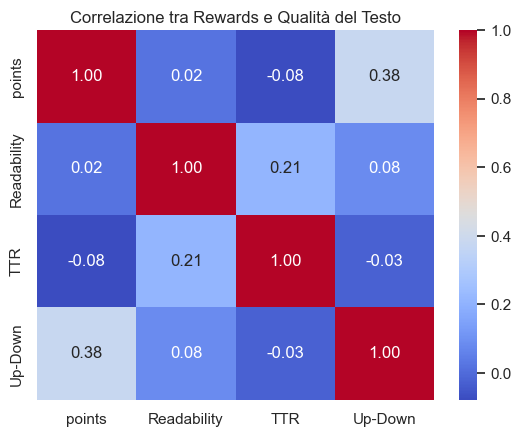

In [590]:
x_corr = pd.merge(grouped_rewards, grouped_comm, on=['Year-Month', 'Author'], how='left')

qual_correlations = x_corr[['points', 'Readability', 'TTR', 'Up-Down']].corr(method='pearson')
print(qual_correlations)

sns.heatmap(qual_correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlazione tra Rewards e Qualità del Testo')
plt.show()


In [628]:
filtered_data = filtered_data[filtered_data['Author'].isin(all_rewards['Author'])]
filtered_data

,Author,Text,Up-Down,Year,retrieved_utc,created_utc,Retrieved_on,num_comments,created_datetime,Year-Month,Readability,TTR,Length,Num_Words,Num_Sentences,Num_Syllables,Avg_Sentence_Length
162838,EthTraderCommunity,Venture investor explains why Ethereum is pois...,4,2021,1.623353e+09,1611100865,NaN,4,2021-01-20 00:01:05,2021-01,3.6,13.000000,13.0,14.0,1.0,16.0,14.000000
162841,MostPopularDude,Ethereum 2.0 closes in on $4B value locked as ...,2,2021,1.623353e+09,1611102915,NaN,1,2021-01-20 00:35:15,2021-01,5.6,15.000000,15.0,17.0,1.0,20.0,17.000000
162846,EthTraderCommunity,11 indicators that suggest Ether’s new ATH is ...,21,2021,1.623353e+09,1611107466,NaN,6,2021-01-20 01:51:06,2021-01,6.4,11.000000,11.0,13.0,1.0,17.0,13.000000
162848,EthTraderCommunity,Altcoins Spring Higher As Bitcoin Lingers Belo...,1,2021,1.623353e+09,1611108966,NaN,1,2021-01-20 02:16:06,2021-01,6.4,12.000000,12.0,13.0,1.0,16.0,13.000000
162849,devboricha,"Ether, the world's second-biggest cryptocurren...",3,2021,1.623353e+09,1611109873,NaN,4,2021-01-20 02:31:13,2021-01,8.0,11.200000,12.0,15.0,1.0,19.0,15.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365553,Boo-Lemon,It’s a Solanaissance: These 5 charts will cure...,0,2023,NaN,1704043122,1.704043e+09,1,2023-12-31 17:18:42,2023-12,2.9,11.000000,11.0,14.0,1.0,13.0,14.000000
365555,bzzking,Sam Bankman-Fried will not receive a 2nd trial...,26,2023,NaN,1704045354,1.704045e+09,1,2023-12-31 17:55:54,2023-12,8.7,243.079316,521.0,643.0,27.0,742.0,23.814815
365556,Lokiee0077,Goldman Sachs crypto head expects pension fund...,6,2023,NaN,1704045779,1.704046e+09,2,2023-12-31 18:02:59,2023-12,11.4,48.410959,62.0,73.0,2.0,98.0,36.500000
365559,teeceaustralia,Vitalik Buterin Reveals Ethereum’s Road Map Fo...,7,2023,NaN,1704059279,1.704059e+09,1,2023-12-31 21:47:59,2023-12,5.2,8.000000,8.0,10.0,1.0,12.0,10.000000


In [645]:
import pandas as pd
import textstat
import nltk

# Ensure you have the necessary NLTK resources
nltk.download('punkt')

# Define a function to calculate all readability and other text metrics
def calculate_text_metrics(text):
    metrics = {}
    
    # Length of post (in characters, including spaces and punctuation)
    metrics['Post Length (Chars)'] = len(text)
    
    # Number of words in the post
    metrics['Num_Words'] = len(nltk.word_tokenize(text))
    
    # Number of sentences in the post
    metrics['Num_Sentences'] = len(nltk.sent_tokenize(text))
    
    # Number of syllables in the post (using textstat)
    metrics['Num_Syllables'] = textstat.syllable_count(text)
    
    # Average sentence length (words per sentence)
    metrics['Avg_Sentence_Length'] = metrics['Num_Words'] / metrics['Num_Sentences'] if metrics['Num_Sentences'] > 0 else 0
    
    # Lix Readability Formula
    metrics['Lix'] = textstat.lix(text)
    
    # Gunning Fog Index
    metrics['Gunning Fog'] = textstat.gunning_fog(text)
    
    # Automated Readability Index (ARI)
    metrics['ARI'] = textstat.automated_readability_index(text)
    
    # Coleman-Liau Index
    metrics['Coleman-Liau'] = textstat.coleman_liau_index(text)
    
    # Flesch Reading Ease
    metrics['Reading Ease'] = textstat.flesch_reading_ease(text)
    
    # Flesch-Kincaid Grade Level
    metrics['Grade Level'] = textstat.flesch_kincaid_grade(text)
    
    return metrics

# Apply the function to each row in the 'Text' column and store results
readability_metrics = filtered_data['Text'].apply(calculate_text_metrics)

# Convert the resulting list of dictionaries to a DataFrame
readability_df = pd.DataFrame(list(readability_metrics))

# Concatenate the original filtered data with the readability metrics DataFrame
correlation_df = pd.concat([filtered_data[['Author', 'Up-Down', 'num_comments', 'Year-Month']], readability_df], axis=1)

# Display the resulting DataFrame with readability metrics and text features
correlation_df


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aless\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Author,Up-Down,num_comments,Year-Month,Post Length (Chars),Num_Words,Num_Sentences,Num_Syllables,Avg_Sentence_Length,Lix,Gunning Fog,ARI,Coleman-Liau,Reading Ease,Grade Level
162838,EthTraderCommunity,4.0,4.0,2021-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162841,MostPopularDude,2.0,1.0,2021-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162846,EthTraderCommunity,21.0,6.0,2021-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162848,EthTraderCommunity,1.0,1.0,2021-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162849,devboricha,3.0,4.0,2021-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106532,NaN,NaN,NaN,NaN,71.0,14.0,1.0,13.0,14.000000,38.27,4.40,10.2,12.62,94.15,2.9
106533,NaN,NaN,NaN,NaN,3061.0,643.0,27.0,742.0,23.814815,42.91,10.18,10.4,9.45,62.68,8.7
106534,NaN,NaN,NaN,NaN,408.0,73.0,2.0,98.0,36.500000,59.41,11.51,15.2,13.87,50.46,11.4
106535,NaN,NaN,NaN,NaN,52.0,10.0,1.0,12.0,10.000000,58.00,8.20,9.1,12.25,71.82,5.2


In [646]:
# Seleziona le colonne desiderate
final_destra = correlation_df[['Author','Up-Down',	'num_comments',	'Year-Month']]
# Seleziona le colonne rimanenti
final_sinistra = correlation_df.drop(columns=['Author', 'Up-Down',	'num_comments',	'Year-Month'])

final_destra = final_destra[:106537]
final_sinistra = final_sinistra[106537:]
final_destra = final_destra.reset_index(drop=True)
final_sinistra = final_sinistra.reset_index(drop=True)
final_uniti = pd.concat([final_destra,final_sinistra], axis=1)
final_uniti


,Author,Up-Down,num_comments,Year-Month,Post Length (Chars),Num_Words,Num_Sentences,Num_Syllables,Avg_Sentence_Length,Lix,Gunning Fog,ARI,Coleman-Liau,Reading Ease,Grade Level
0,EthTraderCommunity,4.0,4.0,2021-01,77.0,14.0,1.0,16.0,14.000000,43.77,5.20,8.6,9.96,92.12,3.6
1,MostPopularDude,2.0,1.0,2021-01,78.0,17.0,1.0,20.0,17.000000,28.33,6.00,6.2,5.73,81.63,5.6
2,EthTraderCommunity,21.0,6.0,2021-01,64.0,13.0,1.0,17.0,13.000000,47.36,8.04,7.2,9.49,68.77,6.4
3,EthTraderCommunity,1.0,1.0,2021-01,75.0,13.0,1.0,16.0,13.000000,44.33,4.40,11.5,14.25,68.77,6.4
4,devboricha,3.0,4.0,2021-01,83.0,15.0,1.0,19.0,15.000000,53.67,8.13,12.8,14.20,59.30,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106532,Boo-Lemon,0.0,1.0,2023-12,71.0,14.0,1.0,13.0,14.000000,38.27,4.40,10.2,12.62,94.15,2.9
106533,bzzking,26.0,1.0,2023-12,3061.0,643.0,27.0,742.0,23.814815,42.91,10.18,10.4,9.45,62.68,8.7
106534,Lokiee0077,6.0,2.0,2023-12,408.0,73.0,2.0,98.0,36.500000,59.41,11.51,15.2,13.87,50.46,11.4
106535,teeceaustralia,7.0,1.0,2023-12,52.0,10.0,1.0,12.0,10.000000,58.00,8.20,9.1,12.25,71.82,5.2


In [659]:
grouped = final_uniti.groupby(['Year-Month', 'Author']).agg({
    'Up-Down': 'sum',   
    'num_comments': 'sum',
    'Post Length (Chars)': 'mean',
    'Num_Words': 'mean',
    'Num_Sentences': 'mean',
    'Avg_Sentence_Length': 'mean',
    'Num_Syllables': 'mean',
    'Lix': 'mean',
    'Gunning Fog': 'mean',
    'ARI': 'mean',
    'Coleman-Liau': 'mean',
    'Reading Ease': 'mean',
    'Grade Level': 'mean'
}).reset_index()

grouped['num_posts']= list(final_uniti.groupby(['Year-Month', 'Author']).size())
grouped

,Year-Month,Author,Up-Down,num_comments,Post Length (Chars),Num_Words,Num_Sentences,Avg_Sentence_Length,Num_Syllables,Lix,Gunning Fog,ARI,Coleman-Liau,Reading Ease,Grade Level,num_posts
0,2021-01,-0-O-,15.0,7.0,67.000000,12.000000,1.000000,12.000000,18.000000,53.440000,12.490000,14.000000,17.020000,28.500000,11.500000,1
1,2021-01,0xholdthedoor,59.0,4.0,16.500000,3.500000,1.000000,3.500000,4.250000,8.250000,1.300000,0.350000,-1.960000,93.560000,1.000000,4
2,2021-01,AbsurdPickle,3.0,2.0,14.000000,3.000000,1.000000,3.000000,3.000000,3.000000,1.200000,-1.200000,-2.380000,119.190000,-2.700000,1
3,2021-01,Accurate-Ad5252,1.0,0.0,45.000000,16.000000,4.000000,4.000000,9.000000,32.000000,2.800000,7.600000,4.940000,89.750000,2.500000,1
4,2021-01,Airdrop_finder,1775.0,161.0,43.400000,8.800000,1.000000,8.800000,10.800000,24.668000,4.464000,3.720000,4.478000,87.246000,3.020000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,2023-12,rootpl,362.0,77.0,1070.476190,185.000000,6.428571,26.165449,227.571429,39.092381,8.954286,19.328571,19.947143,50.874762,9.628571,21
7028,2023-12,spacsandspacs,10.0,2.0,55.000000,11.000000,1.000000,11.000000,14.000000,42.330000,3.600000,7.700000,9.940000,62.340000,6.800000,1
7029,2023-12,teeceaustralia,81.0,86.0,78.447368,14.289474,1.026316,14.092105,18.710526,50.797368,8.939474,10.944737,13.123158,63.211316,7.289474,38
7030,2023-12,tonuorak,13.0,1.0,62.000000,10.000000,1.000000,10.000000,17.000000,50.000000,8.000000,8.500000,11.980000,52.870000,8.400000,1


In [690]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'grouped_rewards' and 'grouped' are already defined

# Merge DataFrames
corr_post = pd.merge(grouped_rewards, grouped, on=['Year-Month', 'Author'], how='left')
corr_post = corr_post[corr_post['num_comments'] >= 0]
corr_post = corr_post.rename(columns={'points': 'rewards'})
# Calculate correlations
qual_correlations = corr_post[['rewards', 'Up-Down', 'num_comments', 'Post Length (Chars)', 
                                'Num_Words', 'Num_Sentences', 'Avg_Sentence_Length', 
                                'Num_Syllables', 'Lix', 'Gunning Fog', 'ARI', 
                                'Coleman-Liau', 'Reading Ease', 'Grade Level', 
                                'num_posts']].corr(method='pearson')


# Filter correlations for 'points'
points_correlations = qual_correlations.loc[['rewards']]

# Set figure size for wider heatmap
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Create the heatmap
sns.heatmap(points_correlations, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Title and labels
plt.title("Correlation between Rewards and Text's Metrics on Posts data1")
plt.yticks(rotation=0)

# Show the plot
plt.show()


KeyError: "['num_posts'] not in index"

In [681]:
filtered_comments = filtered_comments[filtered_comments['Author'].isin(all_rewards['Author'])]
filtered_comments

,Author,Text,Up-Down,Year,retrieved_utc,created_utc,Retrieved_on,Link_id,Parent_id,exact_data,created_datetime,Year-Month,Readability,TTR
2831412,bedla,"So you are excited about price ^(in BTC), right?",2,2021,NaN,1611101343,1.621528e+09,t3_l0wi5l,t3_l0wi5l,2021-05-20 16:21:21,2021-01-20 00:09:03,2021-01,2.1,9.000000
2831413,Basoosh,I watched KIN's case with the SEC very closely...,4,2021,NaN,1611101530,1.621528e+09,t3_kf251b,t1_gjvmqxa,2021-05-20 16:24:10,2021-01-20 00:12:10,2021-01,6.0,111.265487
2831415,Basoosh,Imagine if there was a way to earn crypto for ...,2,2021,NaN,1611101850,1.621528e+09,t3_kf251b,t1_gjvd7r2,2021-05-20 16:28:51,2021-01-20 00:17:30,2021-01,2.9,15.157895
2831423,icofreak,and so are the prices. i had to check the date...,1,2021,NaN,1611103400,1.621530e+09,t3_l0wxn0,t1_gjw33ni,2021-05-20 16:51:59,2021-01-20 00:43:20,2021-01,1.5,19.173913
2831424,Enschede2,All time high,1,2021,NaN,1611103418,1.621530e+09,t3_l0njfn,t1_gjvxiix,2021-05-20 16:52:16,2021-01-20 00:43:38,2021-01,-2.7,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5544538,Fredzoor,Happy new yeaaaaaar,3,2023,NaN,1704066513,1.704067e+09,t3_18uuc4n,t1_kfrk3rh,2023-12-31 23:48:51,2023-12-31 23:48:33,2023-12,0.9,3.000000
5544539,SigiNwanne,Happy new year Bronuts. May the odds of the ma...,3,2023,NaN,1704066521,1.704067e+09,t3_18uuc4n,t3_18uuc4n,2023-12-31 23:48:55,2023-12-31 23:48:41,2023-12,1.9,13.136364
5544540,Fredzoor,"Me!✋🏼 In fact, habd me some whiskey now, i’m ...",2,2023,NaN,1704066580,1.704067e+09,t3_18uuc4n,t1_kfrb22i,2023-12-31 23:49:55,2023-12-31 23:49:40,2023-12,1.7,10.352941
5544541,Fredzoor,Happy new yr bro !!,1,2023,NaN,1704066610,1.704067e+09,t3_18uuc4n,t1_kfqzayb,2023-12-31 23:50:28,2023-12-31 23:50:10,2023-12,1.3,4.166667


In [682]:
import pandas as pd
import textstat
import nltk

# Ensure you have the necessary NLTK resources
nltk.download('punkt')

# Define a function to calculate all readability and other text metrics
def calculate_text_metrics(text):
    metrics = {}
    
    # Length of post (in characters, including spaces and punctuation)
    metrics['Post Length (Chars)'] = len(text)
    
    # Number of words in the post
    metrics['Num_Words'] = len(nltk.word_tokenize(text))
    
    # Number of sentences in the post
    metrics['Num_Sentences'] = len(nltk.sent_tokenize(text))
    
    # Number of syllables in the post (using textstat)
    metrics['Num_Syllables'] = textstat.syllable_count(text)
    
    # Average sentence length (words per sentence)
    metrics['Avg_Sentence_Length'] = metrics['Num_Words'] / metrics['Num_Sentences'] if metrics['Num_Sentences'] > 0 else 0
    
    # Lix Readability Formula
    metrics['Lix'] = textstat.lix(text)
    
    # Gunning Fog Index
    metrics['Gunning Fog'] = textstat.gunning_fog(text)
    
    # Automated Readability Index (ARI)
    metrics['ARI'] = textstat.automated_readability_index(text)
    
    # Coleman-Liau Index
    metrics['Coleman-Liau'] = textstat.coleman_liau_index(text)
    
    # Flesch Reading Ease
    metrics['Reading Ease'] = textstat.flesch_reading_ease(text)
    
    # Flesch-Kincaid Grade Level
    metrics['Grade Level'] = textstat.flesch_kincaid_grade(text)
    
    return metrics

# Apply the function to each row in the 'Text' column and store results
readability_metrics = filtered_comments['Text'].apply(calculate_text_metrics)

# Convert the resulting list of dictionaries to a DataFrame
readability_df = pd.DataFrame(list(readability_metrics))



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aless\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


KeyError: "['num_comments'] not in index"

In [684]:

# Concatenate the original filtered data with the readability metrics DataFrame
correlation_comm_df = pd.concat([filtered_comments[['Author', 'Up-Down',  'Year-Month']], readability_df], axis=1)

# Display the resulting DataFrame with readability metrics and text features
correlation_comm_df

,Author,Up-Down,Year-Month,Post Length (Chars),Num_Words,Num_Sentences,Num_Syllables,Avg_Sentence_Length,Lix,Gunning Fog,ARI,Coleman-Liau,Reading Ease,Grade Level
2831412,bedla,2.0,2021-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2831413,Basoosh,4.0,2021-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2831415,Basoosh,2.0,2021-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2831423,icofreak,1.0,2021-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2831424,Enschede2,1.0,2021-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318881,NaN,NaN,NaN,19.0,3.0,1.0,4.0,3.0,36.33,1.2,6.8,7.32,93.81,0.9
1318882,NaN,NaN,NaN,87.0,22.0,4.0,20.0,5.5,20.26,3.4,2.5,3.15,96.69,1.9
1318883,NaN,NaN,NaN,56.0,17.0,1.0,12.0,17.0,29.18,4.4,3.3,2.13,102.61,1.7
1318884,NaN,NaN,NaN,19.0,6.0,2.0,5.0,3.0,4.00,1.6,-1.9,-4.36,92.80,1.3


In [685]:
# Seleziona le colonne desiderate
final_destra = correlation_comm_df[['Author','Up-Down',	'Year-Month']]
# Seleziona le colonne rimanenti
final_sinistra = correlation_comm_df.drop(columns=['Author', 'Up-Down',	'Year-Month'])

final_destra = final_destra[:1318886]
final_sinistra = final_sinistra[1318886:]
final_destra = final_destra.reset_index(drop=True)
final_sinistra = final_sinistra.reset_index(drop=True)
final_uniti = pd.concat([final_destra,final_sinistra], axis=1)
final_uniti


,Author,Up-Down,Year-Month,Post Length (Chars),Num_Words,Num_Sentences,Num_Syllables,Avg_Sentence_Length,Lix,Gunning Fog,ARI,Coleman-Liau,Reading Ease,Grade Level
0,bedla,2.0,2021-01,48.0,14.0,1.0,11.0,14.000000,20.11,3.60,4.0,3.51,96.18,2.1
1,Basoosh,4.0,2021-01,1059.0,226.0,12.0,258.0,18.833333,31.25,8.72,7.4,7.07,80.51,6.0
2,Basoosh,2.0,2021-01,82.0,19.0,2.0,20.0,9.500000,26.75,5.70,2.0,3.20,88.74,2.9
3,icofreak,1.0,2021-01,99.0,23.0,2.0,23.0,11.500000,24.79,4.20,1.5,2.53,103.12,1.5
4,Enschede2,1.0,2021-01,13.0,3.0,1.0,3.0,3.000000,3.00,1.20,-2.7,-4.29,119.19,-2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318881,Fredzoor,3.0,2023-12,19.0,3.0,1.0,4.0,3.000000,36.33,1.20,6.8,7.32,93.81,0.9
1318882,SigiNwanne,3.0,2023-12,87.0,22.0,4.0,20.0,5.500000,20.26,3.40,2.5,3.15,96.69,1.9
1318883,Fredzoor,2.0,2023-12,56.0,17.0,1.0,12.0,17.000000,29.18,4.40,3.3,2.13,102.61,1.7
1318884,Fredzoor,1.0,2023-12,19.0,6.0,2.0,5.0,3.000000,4.00,1.60,-1.9,-4.36,92.80,1.3


In [686]:
grouped = final_uniti.groupby(['Year-Month', 'Author']).agg({
    'Up-Down': 'sum',   
    'Post Length (Chars)': 'mean',
    'Num_Words': 'mean',
    'Num_Sentences': 'mean',
    'Avg_Sentence_Length': 'mean',
    'Num_Syllables': 'mean',
    'Lix': 'mean',
    'Gunning Fog': 'mean',
    'ARI': 'mean',
    'Coleman-Liau': 'mean',
    'Reading Ease': 'mean',
    'Grade Level': 'mean'
}).reset_index()

grouped['num_comments']= list(final_uniti.groupby(['Year-Month', 'Author']).size())
grouped

,Year-Month,Author,Up-Down,Post Length (Chars),Num_Words,Num_Sentences,Avg_Sentence_Length,Num_Syllables,Lix,Gunning Fog,ARI,Coleman-Liau,Reading Ease,Grade Level,num_comments
0,2021-01,-0-O-,30.0,216.692308,45.538462,2.769231,16.423077,52.769231,31.172308,7.309231,8.353846,5.994615,79.362308,5.669231,13
1,2021-01,-AndyDufresne-,25.0,24.857143,6.000000,1.000000,6.000000,6.142857,12.584286,1.942857,-0.442857,-6.734286,102.804286,0.085714,7
2,2021-01,-timenotspace-,12.0,201.400000,40.800000,2.200000,17.100000,48.800000,34.022000,8.378000,8.680000,8.334000,74.580000,6.640000,5
3,2021-01,3me_owen,61.0,36.242424,8.575758,1.363636,5.964646,9.151515,17.064242,3.484242,0.903030,-1.910303,95.246667,1.339394,33
4,2021-01,409h,4.0,124.000000,30.000000,2.000000,15.000000,30.000000,24.790000,6.100000,6.900000,7.460000,77.740000,5.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24626,2023-12,wen_eip,1210.0,64.938176,14.278207,1.205564,12.012519,15.366306,28.982937,5.899753,7.557960,4.696121,83.779134,3.997372,647
24627,2023-12,wizad23,2.0,37.500000,8.500000,1.500000,4.750000,9.000000,11.440000,4.575000,4.850000,-6.060000,105.740000,-0.600000,2
24628,2023-12,xMrDeex,8.0,49.750000,10.250000,1.250000,9.375000,10.250000,47.875000,15.817500,37.375000,32.092500,26.047500,11.450000,4
24629,2023-12,yester_philippines,2093.0,81.175527,17.359077,1.110331,16.646606,19.312939,36.075908,10.423210,18.939519,14.461003,55.376118,8.992678,997


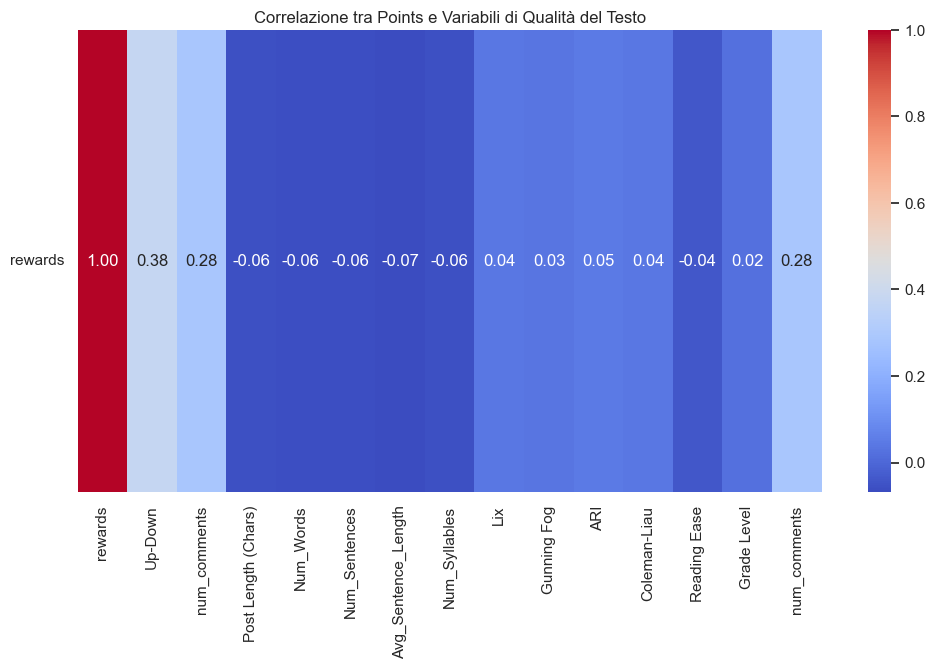

In [688]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'grouped_rewards' and 'grouped' are already defined

# Merge DataFrames
corr_post = pd.merge(grouped_rewards, grouped, on=['Year-Month', 'Author'], how='left')
corr_post = corr_post[corr_post['num_comments'] >= 0]
corr_post = corr_post.rename(columns={'points': 'rewards'})
# Calculate correlations
qual_correlations = corr_post[['rewards', 'Up-Down', 'num_comments', 'Post Length (Chars)', 
                                'Num_Words', 'Num_Sentences', 'Avg_Sentence_Length', 
                                'Num_Syllables', 'Lix', 'Gunning Fog', 'ARI', 
                                'Coleman-Liau', 'Reading Ease', 'Grade Level']].corr(method='pearson')


# Filter correlations for 'points'
points_correlations = qual_correlations.loc[['rewards']]

# Set figure size for wider heatmap
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Create the heatmap
sns.heatmap(points_correlations, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Title and labels
plt.title('Correlazione tra Points e Variabili di Qualità del Testo')
plt.yticks(rotation=0)

# Show the plot
plt.show()
